<a href="https://colab.research.google.com/github/alvarolj23/brujulaDataScientist/blob/main/210503_AC_AKKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Log in with Drive account

In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

In [ ]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1yt76WagYSmJvAL-fgelsFtf7Ms6A7_Fw' in parents"}).GetList()

for f in file_list:
    # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: Measurement_points_for_SAUDI ARAMCO_2021-04-07-09-25-22.csv, id: 1jwE_mV9WlOAGtBAwPrOzeeFEdlO12xiF
downloading to /root/data/Measurement_points_for_SAUDI ARAMCO_2021-04-07-09-25-22.csv
title: RUL predicted-real.png, id: 1LH0okRD1iO904o-647VtFW680U3F0jBG
downloading to /root/data/RUL predicted-real.png
title: ReportingPeriod.png, id: 1aUgpC9L0Nt8ZsgEmDfFXK7FuBcaJfhew
downloading to /root/data/ReportingPeriod.png
title: SmartlinkData.jpeg, id: 1Gyfi-umyRKlvF7Gmvkexi0ceF-BqRXuN
downloading to /root/data/SmartlinkData.jpeg
title: PredictiveMaintenancePlans.png, id: 1Q9ENNNnQquajdbnpCML3LzD1Jjr3o8WI
downloading to /root/data/PredictiveMaintenancePlans.png
title: ProblemSolvingTable.png, id: 1kMK_ThLHvk7KAGgf_agbVhhyOHtUz8x9
downloading to /root/data/ProblemSolvingTable.png




```
with open(fname, 'r') as f:
  print(f.read())
```



# Import libraries

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


# **Business Context**


Europe based air compressor manufacturers face harder competition from emerging countries based companies. 
To counter these competitors, they seek to improve predictability of failure and need for maintenance of the machinery they produce and sell.

Their key business objectives by evolving towards a predictive maintenance capability are:
*   To augment their maintenance service profitability, by right-sizing their technical intervention workforce *(field service engineers, coordination & planning officers)* and stocks *(capacity & locations)*;
*   To optimize their maintenance service contracts' profitability level, by adapting their maintenance cycles based on clients' actual field context, use frequency and conditions, real-time wear input;
*   To increase clients' trust in their quality products by increasing the products reliability, predicting and timely intervene before machinery breakage occurs, preventing avoidable operations impact on their clients' business.

**Roadmap and key milestones**
As they already have a whole set of sensors built-in in many of their products,achieving a **Predictive Mmaintenance Capability is** identified as the **1st keymilestone** on their roadmap.

In a parallel track, they conduct actions for the **optimization of their workforce and stocks**. There are so many factors involved in it, that the road to true optimization is hard and complex. Key factors identified as key are:
*   travel conditions: traffic on roads, client site accessibility, distances *(their base locations <=> client locations <=> stock locations)*, weather, ...
*   constraints of their field service technicians: availability, performance, motivation, knowledge, experience, ...
*   information provision & accessibility *(equipment: asset & configuration information, historical data; knowledge libraries access; ...)*
*   and more...

These 2 key milestones are the biggest basis for enabling the optimization of the maintenance service contracts. However, data on the business agreements are another set of key elements such as:
*   contract service data: service period, coverage type, service cycles, next renewal, penalties, rebates, ...
*   financial data: standard and actual service pricing, TCO against service contracts, profitability calculations, ...

**Conclusion**: the data inputs required to achieve the business goals, are tremendous in variety, size and potential risk of accuracy & completeness.

# Scope and objectives



The extent of the achieving the Predictive Maintenance Capability would require more time, efforts, investments and data input than available today.
Therefore, the present project's **scope is limited** to the generation of a theoretical basis for the predictive maintenance on a subset of factors for an air compressor.

As this project is conducted without support from manufacturers, the **biggest  constraints** faced are the **absence of actual full data on compressors'** sensing capabilities, and the **unavailability of historical field data**.
To enable this project, a specific aire compressor type of Atlas Copco has been selected and is considered in scope of the project.

As per all of the above, this **project will be fed mostly with dummy data** based on accessible data sources scattered throughout the internet.
To enhance representitiveness of the dummy data, advanced engineers in mechincal engineering will review the data against their field experiences.
The final outcome is to identify the procedure to set up predictive maintenance for such air compressor, from a data perspective.

**The focus will be set on "Oil-lubricated screw compressor G (VSD) & GX.  --->  G7-22"**    


| Technical specification|  |
| --- | --- |
| Capacity FAD l/s | 4 l/s - 60,2 l/s  |
| Working pressure | 7,4 bar(e) - 13 bar(e) |
| Installed motor power | 2,2 kW - 22 kW |
| Capacity FAD | 14,4 m³/h - 119,3 m³/h |

**Objectives of the present project** are: 

1. Study how predictive maintenance works for the compressor type
2. Identify the variables to consider and track
3. Generate an algorithm to predict need for maintenance and prevent failure
4. Predict compressor’s remaining further operating capacity


### Purposes of data science for the compressors 
As mentioned in the business context chapter the following criteria are subject to data science
- Performance vs wear (aging related)
  - Predict highest probability of (next) breakdown
  - Predict right time for preventive maintenance
- Interventions
  - Avoid unnecessary interventions
  - Optimize technicians interventions (in scheduling & at optimized cost)
- Stocks optimization
  - Reduce average stock cost, by preventing unnecessary spare stock (c.q. "spares offer") surplus through needs forecasting capability (c.q. "spares demand")
  - Right-sizing stock locations (in capacity) 
- Maintenance contract profitability optimization
  - Avoid potential penalties & high costs related to incident resolution actions, by reducing risk breakdown through timely detection and prediction
  - Reduce average cost of intervention within contract through optimized maintenance interventions (people, stock, travel, ...)



<p align="center">
  <img width="460" height="500" src="https://miro.medium.com/max/1400/1*hpvbGnXYvhZp1RPJfoZD2A.png">
</p>



## **Solutions to Predictive Maintenance problem**

1. Historical data is available
  1. Obtain Remaining Useful Life (Regression)
  2. Predict if compressor will fail in the next X hours
  3. Classify by state of the compressor
  4. Classify by the type of failure 
2. No-historical data available
  1. Anomaly detection

### Obtain Remaining Useful Life



Remaining useful life (RUL) is the length of time a machine is likely to operate before it requires repair or replacement. By taking RUL into account, engineers can schedule maintenance, optimize operating efficiency, and avoid unplanned downtime. For this reason, estimating RUL is a top priority in predictive maintenance programs.
    
The method used to calculate RUL depends on the kind of data available:

1. Lifetime data indicating how long it took for similar machines to reach failure
2. Run-to-failure histories of machines similar to the one you want to diagnose
3. A known threshold value of a condition indicator that detects failure

<p align="center">
  <img width="460" height="230" src="https://www.mathworks.com/company/newsletters/articles/three-ways-to-estimate-remaining-useful-life-for-predictive-maintenance/_jcr_content/mainParsys/image_0_copy_copy_co_1127560020.adapt.480.medium.jpg/1566909947025.jpg">
</p>







**It would be needed a dataset with:**

For each cycle:
- Data collected from sensors.
- Operating settings.

It is needed to have some historical data of the number of cycles which the machine lived and the value of the variables mentioned before for each cycle.

Then RUL is calculated as (Total number of cycles - current cycle)


***Solution: Feature importance***

Implement Regressor and see how much the different variables (meassured by sensors) affect the RUL.



*   RandomForest regressor
*   Elastic Net GLM
*   Support Vector Machines
*   Gradient Boosting

Ref: https://www.kaggle.com/billstuart/predictive-maintenance-ml-iiot


![](https://drive.google.com/uc?export=view&id=1LH0okRD1iO904o-647VtFW680U3F0jBG)  

### Predict if compressor will fail in the next X hours

MLP:

- 0 means: there will be no failure (machine status "NORMAL")
- 1 means: there will be a pump failure (machine status "BROKEN"/"RECOVERING").

We need to specify two windows:
- Input window
- Output window



![](https://drive.google.com/uc?export=view&id=1jfkbJ2vlRFfPw6XyisB82unMC406itk3)

- Data collected from sensors.
- State of the machine

With the state of the machines we can obtain:

- Duration of the Recovering (maintenance) phase

https://www.kaggle.com/juebrauer/predicting-pump-failure-with-a-mlp

### Clasifying by state of the compressor

**It would be needed a dataset with:**

- Data collected from sensors.
- State of the machine

State of the machine could be: shutdown, normal operation, recovering, etc.

***Solution: Classification algorithms***

- RNN (LSTM) 

### Clasifying by the type of failure

It would be needed a dataset with:

- Failure History: The failure history of a machine or component within the machine.
- Maintenance History: The repair history of a machine, for example, error codes, previous maintenance activities, or component replacement.
- Conditions and use of machines: The operating conditions of a machine, for example, data collected from sensors.
- Machine characteristics: The characteristics of a machine, for example, engine size, make and model, age.

***Solution: Classification algorithms***

- XBOOST: https://www.kaggle.com/josegzz/predictive-maintenance-connect-siscti/data?select=PdM_failures.csv
- CNN: https://towardsdatascience.com/predictive-maintenance-detect-faults-from-sensors-with-cnn-6c6172613371



### Unsupervised: Anomaly detection

When we work with sensors (as in the case of compressors) the number of "normal" data (without anomaly / failure) that we have is usually very high, so if we raised the problem as a supervised problem, we would have very unbalanced classes (bad idea, almost certainly doomed to failure). For this reason, it is usually posed as an unsupervised problem, in which the algorithm learns the "normal" class, and everything else is treated as something "abnormal" (anomaly, failure, stop, etc.)

For the algorithms we can use any unsupervised algorithm that allows to detect clusters: 

- From a simple PCA
- Gaussian mixture model
- More sophisticated models such as a Deep Autoencoder. 

With recurring networks we can do the same, using the sequence-to-sequence architecture (which is still an encoder-decoder architecture).

The idea is therefore to train the model with the normal data only. To do this, we have to work hand in hand with someone who knows the compressor very well, and tells you which periods to filter. Then we train the model to learn the normal behavior of the compressor, and detect as non-normal anything that comes out of there. It is critical, therefore, that everything that can be considered an anomaly (a programmed shutdown, a failure, or other things) is filtered very well.

https://aws.amazon.com/es/lookout-for-equipment/

# Information from AC





## Eletronikon (MK5)

Type of data collected by the Eletronikon (MK5). All pressure measurements are done with pressure transducer and temperature measurements with PT1000 and sometimes PT100 for motor windings and bearings. Below are the data collected by the Eletronikon to monitor the compressor :


*   outlet pressure
*   oil pressure
*   inter & aftercooler pressure
*   outlet compressor temperature
*   outlet elements (HP & LP) tempertature
*   temperature of cooling water (inlet & outlet)
*   oil temperature
*   motor windings and bearings temperature
*   inter & aftercooler level switch => I think these are magnetic level switches


**Service plan**

[AC Service Plan](https://drive.google.com/file/d/144yBKaCwSmGaHffXKABeDkQUFTb8G_Wc/view?usp=sharing)


## Data used for their predictive maintenance plans



- MK5 records the remaining Real Time Hours until the next service 
- the service plan can be directly show on the MK5 and is different based on the machine type (oil injected / oil free). Examples of predictive maintenance plans : safety valve test, regreassing, drain test 
- Regular service operation below

![](https://drive.google.com/uc?export=view&id=1Q9ENNNnQquajdbnpCML3LzD1Jjr3o8WI)  


There are also servicing procedures to 
- Put a new air inlet filter
- Change oil filter (oil level can be checked directly on the machine)
- Check settings of the safety valves : this can be done only on a separate compressed air line. Customer can then test if safety valves open at 3.7barg (as example for low pressure) and 11 barg (as example for high pressure)

## Problem solving table


![](https://drive.google.com/uc?export=view&id=1kMK_ThLHvk7KAGgf_agbVhhyOHtUz8x9)    



Potential improvements..really difficult to find some as I think Atlas Copco offer already a lot of support to company who face issues with their compressors. 
- AC can also monitor remotely their compressors at customer's site with the Smartlink option
- All instructions for the maintenance are provided at then end of the project in the Instructions Book
- CTS service is dedicated to resolve issues on customer's site
- they offer also a service plan (see OneDrive) with different levels of services.

## Sensors in ZE/ZA machines

1) Temperature sensors (Ambient °, T ° in element, Exhaust temperature, Oil temperature,)

2) Pressure sensors (exhaust, air filter (to measure the condition of the air filter), oil pressure)

3) Oil level indicator

4) Counters -> number of cycles until parts are replaced (oil filter, oil itself, bearings, ...)

5) Speed sensors for motor

6) SPMs for vibration in motor / bearings

7) temperature in bearings

 

For maintenance I only know about the counters that count the number of cycles until something needs to be replaced and the pressure sensor for the inlet filter

| Variable to be tracked|  Sensor | Magnitudes |
| --- | --- |  --- |
| Ambient temperature| ---|---| 
| Interior compressor temperature|---|---| 
| Oil temperature|---|---|
| Exhaust temperature|---|---|
| Outlet elements High Pressure temperature|---|---|
| Outlet elements Low Pressure temperature|---|---|
| Inlet cooling water temperature|---|---|
| Outlet cooling water temperature|---|---|
| Motor Bearings temperature | --- |  --- |
| Motor Windings temperature | --- |  --- |
| Oil pressure | --- |  --- |
| Air inlet filter pressure | --- |  Condition of the air filter |
| Air outlet filter pressure | --- |  Condition of the air filter |
| Exhaust pressure | --- |  --- |
| Intercooler pressure | --- |  --- |
| Aftercooler pressure | --- |  --- |
| Oil level indicator | --- |  --- |
| Intercooler level switch | --- |  --- |
| Aftercooler level switch | --- |  --- |
| Oil counter  | --- |  --- |
| Oil filter counter  | --- |  --- |
| Bearings counter  | --- |  --- |
| Motor speed  | --- |  --- |
| SPMs vibration motor | --- |  --- |
| SPMs vibration bearings | --- |  --- |




## Data from AC

With this you can obtain data from all compressors worldwide that are connected to a network. Only have access so I am still figuring out what is possible, but I know this so far:

Depending on the unit itself, a number of data points can be read, in this case 49. The frequency of data points depends on the service contract that the customer has with AC, in the best case this is a High Data service, then more often data outputted. Due to costs, this is not done for all units, this would cost 7 million extra per year according to Stijn Jansens (my contact person).

![](https://drive.google.com/uc?export=view&id=1Gyfi-umyRKlvF7Gmvkexi0ceF-BqRXuN)    



![](https://drive.google.com/uc?export=view&id=1Gyfi-umyRKlvF7Gmvkexi0ceF-BqRXuN) 


![](https://drive.google.com/uc?export=view&id=1aUgpC9L0Nt8ZsgEmDfFXK7FuBcaJfhew) 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
smartlink_df = pd.read_csv('/root/data/Measurement_points_for_SAUDI ARAMCO_2021-04-07-09-25-22.csv')

In [ ]:
smartlink_df.columns

Index(['Measurement Point', 'Machine Time', 'Value', 'Unit'], dtype='object')

In [ ]:
smartlink_df.Me

In [ ]:
smartlink_df.groupby('Measurement Point').describe()

Value                                                 \
                       count          mean          std       min       25%   
Measurement Point                                                             
Cooling water out temp  89.0     18.796629     3.282130      7.90     18.10   
Element 1 outlet temp   89.0     64.752809     7.369009     40.60     62.20   
Machine Service State    0.0           NaN          NaN       NaN       NaN   
Outlet Pressure         89.0    488.902809  4551.870946      5.99      6.17   
Outlet Temperature      89.0     30.439326     3.160071     18.80     28.80   
Running hours           95.0  22119.600000   201.321718  21798.00  21930.50   
Time to next service    94.0      0.000000     0.000000      0.00      0.00   

                                                      
                             50%       75%       max  
Measurement Point                                     
Cooling water out temp     18.50     19.50     33.10  
Element 1 outlet temp      63.00     65.30    120.20  
Machine Service State        NaN       NaN       NaN  
Outlet Pressure             6.38      6.58  42948.67  
Outlet Temperature         30.80     32.60     35.30  
Running hours           22116.00  22297.00  22454.00  
Time to next service        0.00      0.00      0.00

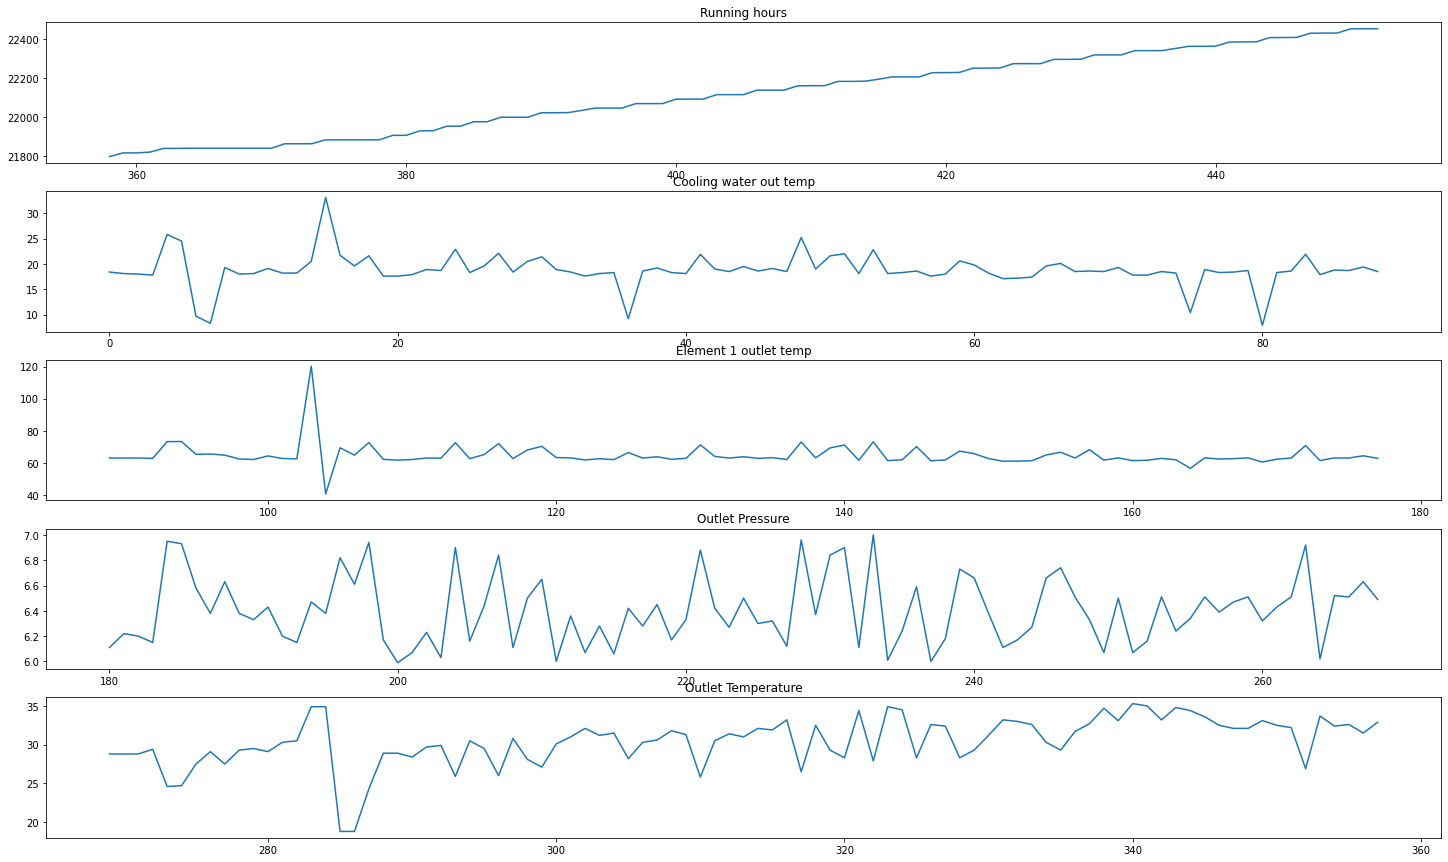

In [ ]:
figure, axes = plt.subplots(5,1,figsize=(25,15))
axes[0].plot(smartlink_df[smartlink_df['Measurement Point'] == 'Running hours'].Value)
axes[1].plot(smartlink_df[smartlink_df['Measurement Point'] == 'Cooling water out temp'].Value)
axes[2].plot(smartlink_df[smartlink_df['Measurement Point'] == 'Element 1 outlet temp'].Value)
axes[3].plot(smartlink_df[smartlink_df['Measurement Point'] == 'Outlet Pressure'].Value)
axes[4].plot(smartlink_df[smartlink_df['Measurement Point'] == 'Outlet Temperature'].Value)

axes[0].title.set_text('Running hours')
axes[1].title.set_text('Cooling water out temp')
axes[2].title.set_text('Element 1 outlet temp')
axes[3].title.set_text('Outlet Pressure')
axes[4].title.set_text('Outlet Temperature')

In [ ]:
smartlink_df[smartlink_df['Measurement Point'] == 'Outlet Pressure'].Value.describe()

count       89.000000
mean       488.902809
std       4551.870946
min          5.990000
25%          6.170000
50%          6.380000
75%          6.580000
max      42948.670000
Name: Value, dtype: float64

# 1. Data Generation: 



The data acquisition step deals with collecting measurement data from the sensors and processing the raw signal to extract useful features that could indicate the system’s health state. This latter task is commonly known as **feature engineering** in data science.

To extract features, signal processing techniques are usually employed to transform raw data into features in a different domain (e.g., time, frequency, time-frequency). Since PdM mainly encounters **non-stationary signals**, time-frequency analysis tools are handy to extract features for diagnostic and prognostic purposes. Under this category, short-time Fourier transform, wavelet package decomposition, empirical mode decomposition, and Hilbert-Huang transform are the most popular approaches.

An additional step after feature extraction is feature reduction. This is the case as the extracted features are usually too numerous to be exploited in practice. Popular dimensionality reduction methods, such as **principal components analysis (PCA)**, kernel-PCA, Isomap, etc., are usually employed to eliminate redundant features.

For this initial state we will try to build some dummy data as accurate as possible.



- Failure History: The failure history of a machine or component within the machine.
- Maintenance History: The repair history of a machine, for example, error codes, previous maintenance activities, or component replacement.
- Conditions and use of machines: The operating conditions of a machine, for example, data collected from sensors.
- Machine characteristics: The characteristics of a machine, for example, engine size, make and model, age.

## 1. Conditions and use of machines

For the dummy data I will create two dataframes:
1. df_nominal : the behaviour would be the nominal one, what would be expected by the manufacturer. Will be used to **train** the model.
2. df_real : the real behaviour of the compressor. Will be used to **test** the model.


In [ ]:
df_nominal = pd.DataFrame()
df_real = pd.DataFrame()

As the signals are not stationary, a timestamp will be needed. We will inspect the behaviour for an specific number of hours of service following Atlas Copco's criteria for the model type in scope.

- Frequency of measurement: 15 min
- Hours of service: 34.000 h (Useful Life)
- For simplicity generating seasonal data, it is started in winter solstice 21 December 2018

1. Inspection visit A (2000- 4000) hours
2. Inspection visit B (4000- 8000) hours
3. Inspection visit C (6000- 12000) hours
4. Inspection visit D (20000- 24000) hours

In [ ]:
hours_service = 34000 # Maximum hours of useful life
frecuency_measurement = 15 # minutes
date_rng = pd.date_range(start='21/12/2018', periods= hours_service*(60/frecuency_measurement), freq='15min')
df_nominal['timestamp'] = date_rng
df_real['timestamp'] = date_rng

It is also needed to take into account the running hours as variable. As the data has been decided to be collected each 15 min, for 1 hour of working, there will be 4 different measurements for the compressor.

In [ ]:
running_minutes = 0.0
df_nominal['running_hours'] = 0.0
df_real['running_hours'] = 0.0
freq = 15.0 # 15 min
for n in range(1,len(df_nominal['timestamp'])):
  running_minutes = (running_minutes + freq)
  df_nominal['running_hours'][n] = float(running_minutes/60)
  df_real['running_hours'][n] = float(running_minutes/60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Inspections: Current preventive maintenance





















Following AC preventive maintenance checksheet, we see visits A and B are almost identical except for few points.

AC main purpose is the migration of the preventive to predictive maintenance by implementing state of the art predictive methods  and by using AI & machine learning methodologies on the available data.

State of the art: 
1. Vibration analysis
2. Infrared Thermal Imaging
3. Fluid Analysis
4. Ultra-Sound Testing
5. Motor Current Analysis


| Inspection visit A (2000 – 4000 hours)| Inspection visit B (4000- 8000) hours | Inspection visit C (6000- 12000) hours hours | Inspection visit D (20000- 24000) hours |
| --- | --- | --- |--- |
| Measuring of temperatures and pressures| Measuring of Temperatures and pressures.| 2|3| 
| Check for air-, water- (*) and oil leaks.| Check for air-, water- (*) and oil leaks.| 2|3| 
| Replace the compressor oil and oil filter.| Replace the compressor oil and oil filter.| 2|3| 
| Cleaning or replace of the air filter.| Replace of the air filter.| 2|3| 
| Check the operation of the air inlet system.| Check the operation of the air inlet system.| 2|3| 
| Check the operation of the water separator.| Disassemble of the water separator and clean the float valve (**)| 2|3| 
| Inspection of the oil cooler, aftercooler and cooling ventilator, and clean externally if necessary.| Clean externally of the oil cooler, aftercooler if necessary.| 2|3| 
| | Disassemble and inspect the control valve.| 2|3| 
| | Test all safety valves and all safety switches. (**)| 2|3| 
| | Cleaning of the cooling channels of the electrical motor. (**) (****)| 2|3| 
| | Check of all bolt connections (compensators, attachments of the element on the carter and carter on the chassis. (**)| 2|3| 

( * )  for G(W) water cooled compressors\
( * * )  when B and C service inspections have occurred during the same annual period, then all actions marked with **, during a B inspection, do not need to be executed.\
( * * * )  depending if the  compressor is equipped with a belt or direct coupling.\
( * * * * )  only valid when the electrical motor is included in the maintenance contract.\


### Seasonal variation
For variables that vary with the season of the year
- Minimum 0
- Maximum 1

In [ ]:
npoints = int(hours_service*(60/frecuency_measurement))

# Linear pattern
years = hours_service/(365*24)
half_year = npoints/(years*2)
time = np.arange(npoints)
values = np.where(time < int(half_year), time, (time[int(half_year)]) - (time - time[int(half_year)]))
values = values/int(half_year)

# Repeat the pattern 2.73 times corresponding to the number of years
seasonal = []
repetitions =  round(years)
for i in range(repetitions):
    for j in range(int(npoints/years)):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(npoints*repetitions)
#plot_time_series(time_seasonal, seasonal, label="Seasonality")

seasonal = seasonal[:len(df_nominal)]

Generating random data with a mean min and max value


```
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = get_truncated_normal(mean=10, sd=2, low=-10, upp=40)
X.rvs(10)
```




### Temperature


- Ambient temperature
- Interior compressor temperature
- Oil temperature
- Exhaust temperature
- Outlet elements HP temperature
- Inlet elements LP temperature
- Motor bearings temperature
- Motor windings temperature

(If refrigerated by water)
- Inlet cooling water temperature
- Outlet cooling water temperature

Generator of normal data

In [ ]:
from scipy.stats import truncnorm
 
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

Nominal temperatures

In [ ]:
#AMBIENT TEMPERATURE 
#Assuming average ambient temperature 10ºC (Belgium)
# In summer can go upto 40 degrees and in winter to -10
temperature_variation = 50
df_nominal['ambient_temperature'] = -10.0 #Starting in winter
seasonal_temperature = [x * temperature_variation for x in seasonal]
df_nominal['ambient_temperature'] = df_nominal['ambient_temperature'] + seasonal_temperature

In [ ]:
#INTERIOR COMPRESSOR TEMPERATURE 
#Assuming average temperature 110ºC 
#Max temperature 135ºC and Min 70ºC
df_nominal['interior_temperature'] = get_truncated_normal(mean=110, sd=8.2, low=70, upp=135).rvs(npoints)

In [ ]:
#OIL TEMPERATURE 
#Assuming average temperature 60ºC 
#Max temperature 85ºC and Min 45ºC
df_nominal['oil_temperature'] = get_truncated_normal(mean=60, sd=5, low=45, upp=85).rvs(npoints)

In [ ]:
#EXHAUST TEMPERATURE 
#Assuming average temperature 140ºC 
#Max temperature 185ºC and Min 95ºC
df_nominal['exhaust_temperature'] = get_truncated_normal(mean=140, sd=12.2, low=95, upp=185).rvs(npoints)

In [ ]:
#HP ELEMENTS TEMPERATURE 
#Assuming average temperature 70ºC 
#Max temperature 75ºC and Min 60ºC
df_nominal['hp_elements_temperature'] = get_truncated_normal(mean=70, sd=1.3, low=60, upp=75).rvs(npoints)

In [ ]:
#LP ELEMENTS TEMPERATURE 
#Assuming average temperature 40ºC 
#Max temperature 50ºC and Min 25ºC
df_nominal['lp_elements_temperature'] = get_truncated_normal(mean=40, sd=3.3, low=25, upp=50).rvs(npoints)

In [ ]:
#MOTOR BEARINGS TEMPERATURE
#It will depend on the INTERIOR COMPRESSOR TEMPERATURE
#Assuming average temperature 40ºC 
#Max temperature 50ºC and Min 25ºC
df_nominal['motor_bearings_temperature'] = get_truncated_normal(mean=40, sd=3.3, low=25, upp=50).rvs(npoints)
df_nominal['motor_bearings_temperature'] = df_nominal['motor_bearings_temperature']\
                                        + np.mean(df_nominal['interior_temperature']) * 0.01 ** (1/2) * np.random.randn(npoints)

In [ ]:
#MOTOR WINDINGS TEMPERATURE
#It will depend on the INTERIOR COMPRESSOR TEMPERATURE
#Assuming average temperature 60ºC 
#Max temperature 75ºC and Min 50ºC
df_nominal['motor_windings_temperature'] = get_truncated_normal(mean=60, sd=3.1, low=50, upp=75).rvs(npoints)
df_nominal['motor_windings_temperature'] = df_nominal['motor_windings_temperature']\
                                        + np.mean(df_nominal['interior_temperature']) * 0.0061 ** (2/3) * np.random.randn(npoints)

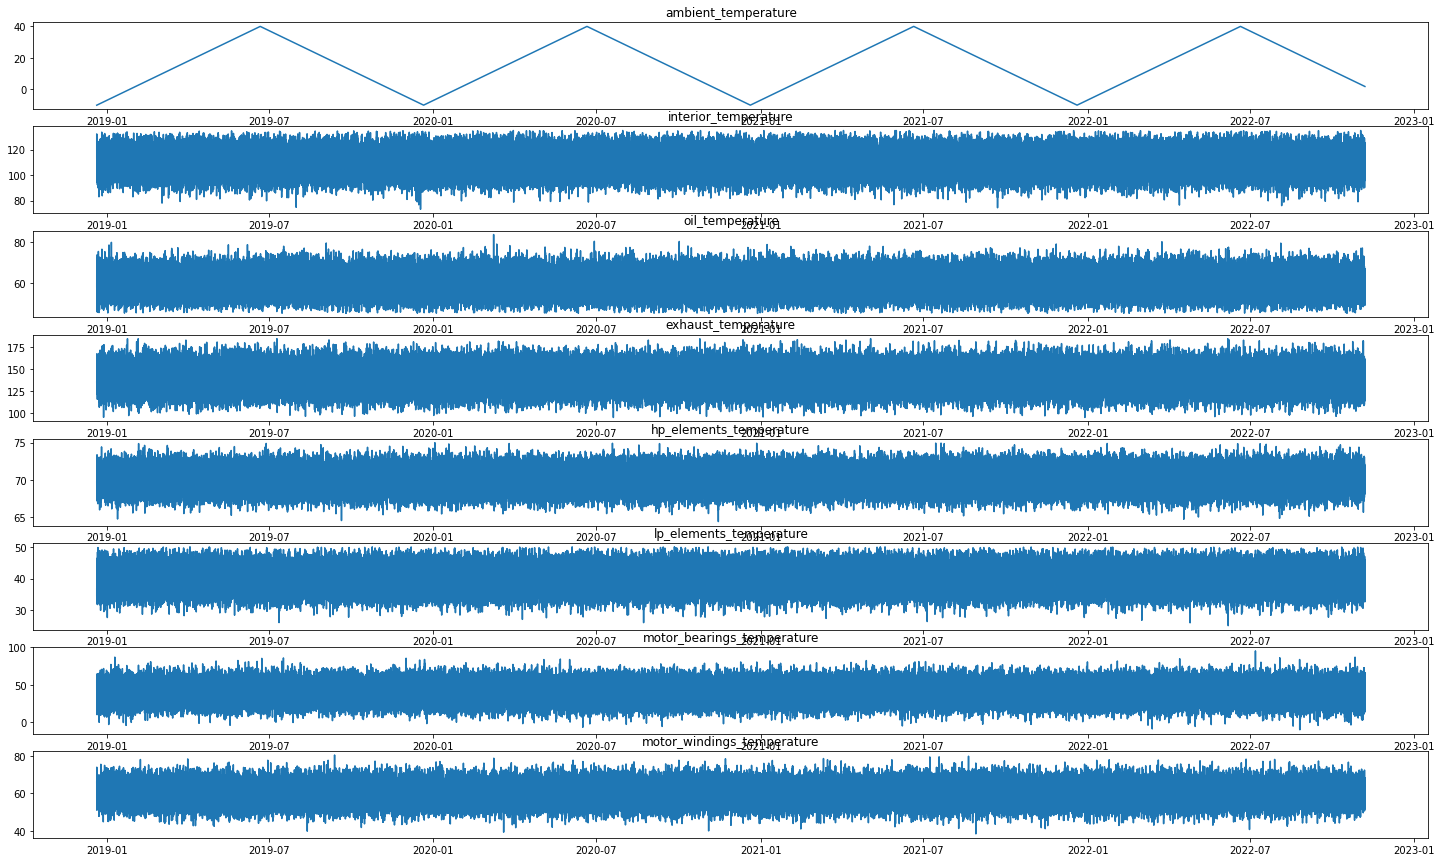

In [ ]:
figure, axes = plt.subplots(8,1,figsize=(25,15))
axes[0].plot(df_nominal['timestamp'], df_nominal['ambient_temperature'])
axes[1].plot(df_nominal['timestamp'], df_nominal['interior_temperature'])
axes[2].plot(df_nominal['timestamp'], df_nominal['oil_temperature'])
axes[3].plot(df_nominal['timestamp'], df_nominal['exhaust_temperature'])
axes[4].plot(df_nominal['timestamp'], df_nominal['hp_elements_temperature'])
axes[5].plot(df_nominal['timestamp'], df_nominal['lp_elements_temperature'])
axes[6].plot(df_nominal['timestamp'], df_nominal['motor_bearings_temperature'])
axes[7].plot(df_nominal['timestamp'], df_nominal['motor_windings_temperature'])

axes[0].title.set_text('ambient_temperature')
axes[1].title.set_text('interior_temperature')
axes[2].title.set_text('oil_temperature')
axes[3].title.set_text('exhaust_temperature')
axes[4].title.set_text('hp_elements_temperature')
axes[5].title.set_text('lp_elements_temperature')
axes[6].title.set_text('motor_bearings_temperature')
axes[7].title.set_text('motor_windings_temperature')


In [ ]:
df_nominal.describe()

,running_hours,ambient_temperature,interior_temperature,oil_temperature,exhaust_temperature,hp_elements_temperature,lp_elements_temperature,motor_bearings_temperature,motor_windings_temperature
count,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000
mean,16999.875000,15.583088,109.972477,60.030182,139.992883,70.006314,39.989375,39.940033,59.993343
std,9814.990661,14.244051,8.160497,4.969514,12.200741,1.301690,3.287025,11.443203,4.798948
min,0.000000,-10.000000,73.247220,45.005100,95.288944,64.365028,25.220234,-9.742143,38.332884
25%,8499.937500,3.613014,104.455838,56.664947,131.746125,69.129200,37.771533,32.212941,56.757706
50%,16999.875000,15.742009,109.974830,60.012128,139.997957,70.008706,39.998123,39.992597,59.993555
75%,25499.812500,27.871005,115.535056,63.399071,148.234920,70.884053,42.217991,47.650445,63.231072
max,33999.750000,40.000000,134.964354,83.849855,184.832485,74.990279,49.997896,94.804247,80.530371


Real temperatures 
bold text

**Assuming:**

When the working hours are close to the inspection visit, the behaviour of some of the variables may vary for the deterioration of compressor components.

i.e: If the oil filter looses its properties the expected behaviour could be a linear raise of the motor temperature.

We will be assuming different stages for maintenance, based on the inspection plan shared by AC, in order to calculate the real values.

- Before inspection visits: <2000 h  ---> maintenance_stage = 0
- Inspection visit 1: 2000-4000 h ---> maintenance_stage = 1
- Inspection visit 2: 4000-8000 h ---> maintenance_stage = 2
- Inspection visit 3: 6000-12000 h ---> maintenance_stage = 3
- Inspection visit 4: 20000-24000) h ---> maintenance_stage = 4
- After inspection visits: >24000 h  ---> maintenance_stage = 5

**Degradation function**

We are creating a function which modifies the nominal data, considering the **degradation** of the elements of the compressor 


In [ ]:
first_inspection = 3000 *(60/frecuency_measurement)
second_inspection = 6000*(60/frecuency_measurement)
third_inspection = 9000*(60/frecuency_measurement)
fourth_inspection = 22000*(60/frecuency_measurement)

Create line with the points. First we will assume linear degradation

In [ ]:
x = np.linspace(1,npoints,npoints)
y = np.linspace(0,0,npoints)
random_factor_1 = np.random.uniform(0.9,1.6)
random_factor_2 = np.random.uniform(0.85,1.7)
random_factor_3 = np.random.uniform(0.85,1.8)
random_factor_4 = np.random.uniform(0.8,1.8)
random_factor_5 = np.random.uniform(0.8,1.8)


We build the y function

In [ ]:
for point in x:
    if ((point>first_inspection*random_factor_1) & (point<first_inspection)):
        slope= 1.2
        y[int(point-1)] = ((point-1)-first_inspection*random_factor_1)*slope
    if ((point>=(first_inspection + (second_inspection-first_inspection)*random_factor_2)) & (point<second_inspection)):
        slope= 1.5
        y[int(point-1)] = ((point-1)-(first_inspection + (second_inspection-first_inspection)*random_factor_2))*slope
    if ((point>=(second_inspection + (third_inspection-second_inspection)*random_factor_3)) & (point<third_inspection)):
        slope= 1.8
        y[int(point-1)] = ((point-1)-(second_inspection + (third_inspection-second_inspection)*random_factor_3))*slope
    if ((point>=(third_inspection + (fourth_inspection-third_inspection)*random_factor_4)) & (point<fourth_inspection)):
        slope= 2
        y[int(point-1)] = ((point-1)-(third_inspection + (fourth_inspection-third_inspection)*random_factor_4))*slope
    if point>=fourth_inspection*random_factor_5:
        slope= 2.3
        y[int(point-1)] = ((point-1)-fourth_inspection*random_factor_5)*slope

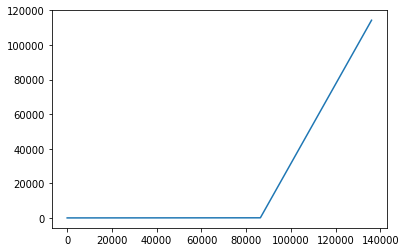

In [ ]:
plt.plot(x,y)

We define the degradation function close to maintenance and a noise factor for creating the real data

In [ ]:
degradation_components = y

In [ ]:
noise = np.random.randn(npoints)
noise_size_factor_temp = 0.5

In [ ]:
#AMBIENT TEMPERATURE is not affected
df_real['ambient_temperature'] = df_nominal['ambient_temperature'] + noise*noise_size_factor_temp*5

In [ ]:
#INTERIOR COMPRESSOR TEMPERATURE 
df_real['interior_temperature'] = df_nominal['interior_temperature'] 
df_real['interior_temperature'] = df_real['interior_temperature'] + degradation_components*0.00013 + noise*noise_size_factor_temp

In [ ]:
#OIL TEMPERATURE 
df_real['oil_temperature'] = df_nominal['oil_temperature'] 
df_real['oil_temperature'] = df_real['oil_temperature'] + degradation_components*0.00021 + noise*noise_size_factor_temp

In [ ]:
#EXHAUST TEMPERATURE 
df_real['exhaust_temperature'] = df_nominal['exhaust_temperature'] 
df_real['exhaust_temperature'] = df_real['exhaust_temperature'] + degradation_components*0.0006 + noise*noise_size_factor_temp

In [ ]:
#HP ELEMENTS TEMPERATURE 
df_real['hp_elements_temperature'] = df_nominal['hp_elements_temperature'] + noise*noise_size_factor_temp

In [ ]:
#LP ELEMENTS TEMPERATURE 
df_real['lp_elements_temperature'] = df_nominal['lp_elements_temperature'] + noise*noise_size_factor_temp

In [ ]:
#MOTOR BEARINGS TEMPERATURE
df_real['motor_bearings_temperature'] = df_nominal['motor_bearings_temperature'] 
df_real['motor_bearings_temperature'] = df_real['motor_bearings_temperature'] + degradation_components*0.000067 + noise*noise_size_factor_temp

In [ ]:
#MOTOR WINDINGS TEMPERATURE
df_real['motor_windings_temperature'] = df_nominal['motor_windings_temperature'] 
df_real['motor_windings_temperature'] = df_real['motor_windings_temperature'] + degradation_components*0.000053 + noise*noise_size_factor_temp


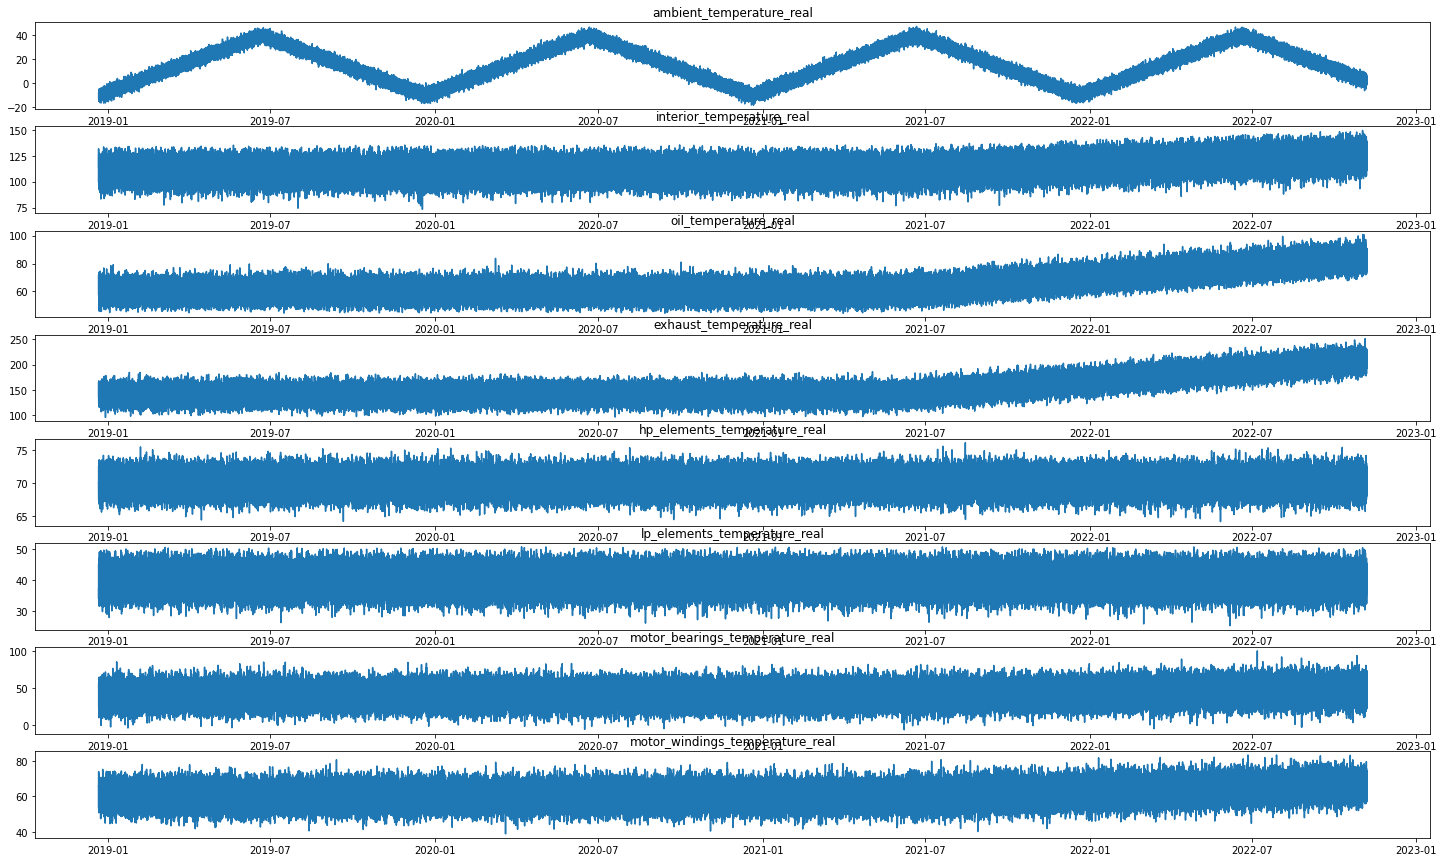

In [ ]:
figure, axes = plt.subplots(8,1,figsize=(25,15))
axes[0].plot(df_real['timestamp'], df_real['ambient_temperature'])
axes[1].plot(df_real['timestamp'], df_real['interior_temperature'])
axes[2].plot(df_real['timestamp'], df_real['oil_temperature'])
axes[3].plot(df_real['timestamp'], df_real['exhaust_temperature'])
axes[4].plot(df_real['timestamp'], df_real['hp_elements_temperature'])
axes[5].plot(df_real['timestamp'], df_real['lp_elements_temperature'])
axes[6].plot(df_real['timestamp'], df_real['motor_bearings_temperature'])
axes[7].plot(df_real['timestamp'], df_real['motor_windings_temperature'])



axes[0].title.set_text('ambient_temperature_real')
axes[1].title.set_text('interior_temperature_real')
axes[2].title.set_text('oil_temperature_real')
axes[3].title.set_text('exhaust_temperature_real')
axes[4].title.set_text('hp_elements_temperature_real')
axes[5].title.set_text('lp_elements_temperature_real')
axes[6].title.set_text('motor_bearings_temperature_real')
axes[7].title.set_text('motor_windings_temperature_real')



### Pressure

- Oil pressure
- Air inlet filter pressure
- Air outlet filter pressure
- Exhaust pressure
- Intercooler pressure
- Aftercooler pressure


Nominal pressures

In [ ]:
#OIL PRESSURE 
#Assuming average oil pressure 1.2 bar 
#Max oil pressure 1.7 bar and Min 1 bar
df_nominal['oil_pressure'] = get_truncated_normal(mean=1.2, sd=.07, low=1, upp=1.7).rvs(npoints)

In [ ]:
#AIR INLET FILTER PRESSURE 
#Assuming average air inlet pressure 1.4 bar 
#Max air inlet pressure 1.8 bar and Min 1.1 bar
df_nominal['air_inlet_pressure'] = get_truncated_normal(mean=1.4, sd=.09, low=1.1, upp=1.8).rvs(npoints)

In [ ]:
#AIR OUTLET FILTER PRESSURE 
#Assuming average air outlet pressure 7.3 bar 
#Max air outlet pressure 8.5 bar and Min 3.5 bar
df_nominal['air_outlet_pressure'] = get_truncated_normal(mean=7.3, sd=0.3, low=2.5, upp=8.5).rvs(npoints)

In [ ]:
#EXHAUST PRESSURE 
#Assuming average exhaust pressure 3.4 bar 
#Max e 3.8 bar and Min 2.7 bat
df_nominal['exhaust_pressure'] = get_truncated_normal(mean=3.4, sd=.172, low=2.7, upp=3.8).rvs(npoints)

In [ ]:
#INTERCOOLER PRESSURE
#Assuming average intercooler pressure 6.5 bar
#Max intercooler pressure 7.8 bar and Min 5.8 bar
df_nominal['intercooler_pressure'] = get_truncated_normal(mean=6.5, sd=1.3, low=5.8, upp=7.8).rvs(npoints)

In [ ]:
#AFTERERCOOLER PRESSURE
#Assuming average aftercooler pressure 2.3 bar
#Max aftercooler pressure 3 bar and Min 1.4 bar
df_nominal['aftercooler_pressure'] = get_truncated_normal(mean=2.3, sd=.39, low=1.4, upp=3.0).rvs(npoints)

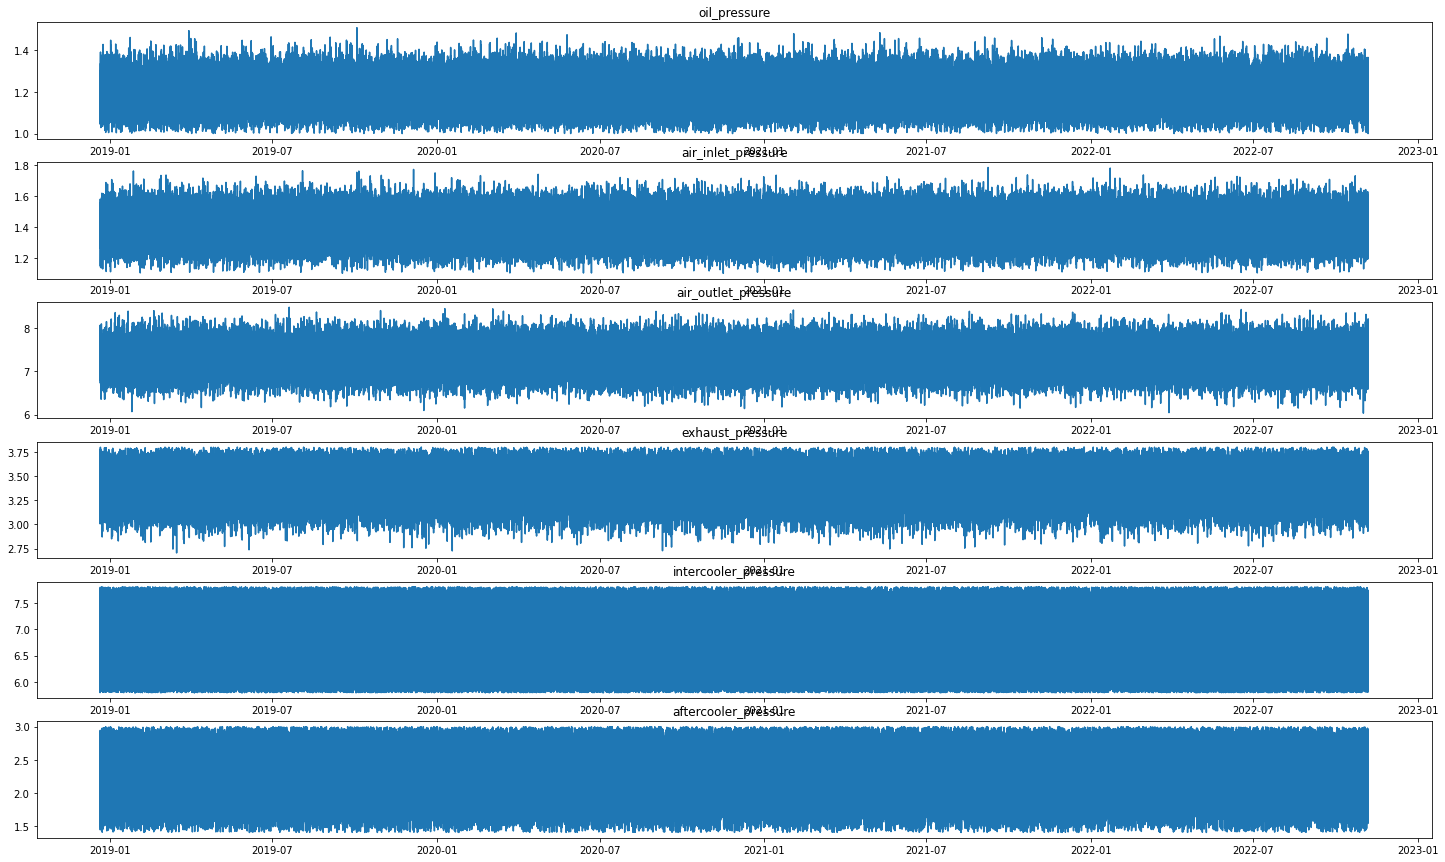

In [ ]:
figure, axes = plt.subplots(6,1,figsize=(25,15))
axes[0].plot(df_nominal['timestamp'], df_nominal['oil_pressure'])
axes[1].plot(df_nominal['timestamp'], df_nominal['air_inlet_pressure'])
axes[2].plot(df_nominal['timestamp'], df_nominal['air_outlet_pressure'])
axes[3].plot(df_nominal['timestamp'], df_nominal['exhaust_pressure'])
axes[4].plot(df_nominal['timestamp'], df_nominal['intercooler_pressure'])
axes[5].plot(df_nominal['timestamp'], df_nominal['aftercooler_pressure'])

axes[0].title.set_text('oil_pressure')
axes[1].title.set_text('air_inlet_pressure')
axes[2].title.set_text('air_outlet_pressure')
axes[3].title.set_text('exhaust_pressure')
axes[4].title.set_text('intercooler_pressure')
axes[5].title.set_text('aftercooler_pressure')



Real pressures

In [ ]:
noise_size_factor_pre = 0.06

In [ ]:
#OIL PRESSURE
df_real['oil_pressure'] = df_nominal['oil_pressure'] 
df_real['oil_pressure'] = df_real['oil_pressure'] + degradation_components*0.0000233 + noise*noise_size_factor_pre

In [ ]:
#AIR INLET PRESSURE
df_real['air_inlet_pressure'] = df_nominal['air_inlet_pressure'] 
df_real['air_inlet_pressure'] = df_real['air_inlet_pressure'] + degradation_components*0.0000133 + noise*noise_size_factor_pre

In [ ]:
#AIR OUTLET PRESSURE
df_real['air_outlet_pressure'] = df_nominal['air_outlet_pressure'] 
df_real['air_outlet_pressure'] = df_real['air_outlet_pressure'] + degradation_components*0.0000133 + noise*noise_size_factor_pre

In [ ]:
#EXHAUST PRESSURE 
df_real['exhaust_pressure'] = df_nominal['exhaust_pressure'] + noise*noise_size_factor_pre

In [ ]:
#INTERCOOLER PRESSURE
df_real['intercooler_pressure'] = df_nominal['intercooler_pressure'] + noise*noise_size_factor_pre

In [ ]:
#AFTERCOOLER PRESSURE
df_real['aftercooler_pressure'] = df_nominal['aftercooler_pressure'] + noise*noise_size_factor_pre

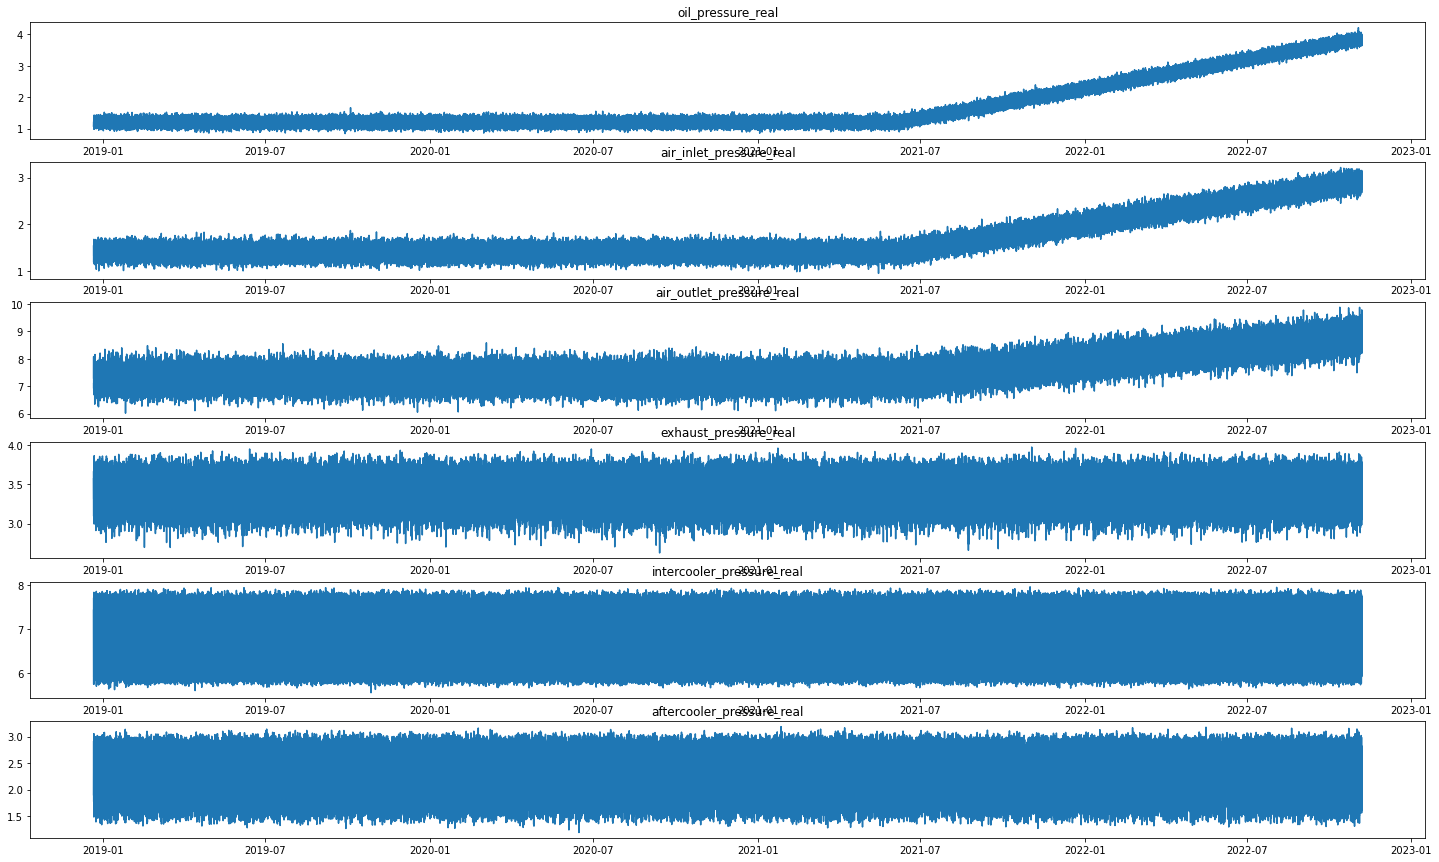

In [ ]:
figure, axes = plt.subplots(6,1,figsize=(25,15))
axes[0].plot(df_real['timestamp'], df_real['oil_pressure'])
axes[1].plot(df_real['timestamp'], df_real['air_inlet_pressure'])
axes[2].plot(df_real['timestamp'], df_real['air_outlet_pressure'])
axes[3].plot(df_real['timestamp'], df_real['exhaust_pressure'])
axes[4].plot(df_real['timestamp'], df_real['intercooler_pressure'])
axes[5].plot(df_real['timestamp'], df_real['aftercooler_pressure'])


axes[0].title.set_text('oil_pressure_real')
axes[1].title.set_text('air_inlet_pressure_real')
axes[2].title.set_text('air_outlet_pressure_real')
axes[3].title.set_text('exhaust_pressure_real')
axes[4].title.set_text('intercooler_pressure_real')
axes[5].title.set_text('aftercooler_pressure_real')

### - **Air water and oil leaks**
At this early stage of the project we haven't consider yet how to keep track of these variables. We explored several methods like ultrasonic leaks detection. In the future we will explore how to sensorize the compressors for tracking these leakages and its **cost**.

For the **nominal** it is assumed there will not be any leakages. 

- False means -> leakage not detected
- True means -> leakage detected

For the **real**, we have estimated propabilities of the events to happen in 24.000 h:

- Oil leakage: 1 %
- Fuel leakage: 0.1 %
- Water leakage: 3%



In [ ]:
#-----------NOMINAL----------------#
df_nominal['oil_leakage'] = False
df_nominal['fuel_leakage'] = False
df_nominal['water_leakage_failure'] = False

#-----------REAL----------------#

random_arr = [False, True]

# Boolean arrays for oil, fuel and water leakages failure
df_real['oil_leakage'] = np.random.choice(random_arr, size = npoints, p=[0.99990, 0.0001])
df_real['fuel_leakage'] = np.random.choice(random_arr, size = npoints, p=[0.9999, 0.0001])
df_real['water_leakage_failure'] = np.random.choice(random_arr, size = npoints, p=[0.9997, 0.0003])


## Air compressor - weekly checklist



As future step, I should identify how to measure the following variables. See sensors in the market. As first deliverable, *I will estimate the behaviour of the sensors.*

Following AC weekly checklist,we studied the variables that we consider we can obtain measures thanks to the sensors installed. 

| AC Weekly Checklist|  Sensor | Nominal Frecuency Inspection AC| Comments |
| --- | --- | --- | --- |
| Oil Leakage |  | |  Assuming binary output (False means no leakage detected)| 
| Fuel Leakage |  | | Assuming binary output (False means no leakage detected)| 
| Water Leakage |  | | Assuming binary output (False means no leakage detected)| 
| Electrolytes level |  | | Assuming binary output (False means electrolytes level inside the margin)| 
| Air Impeller Level |  | | Assuming output 0-10 V| 
| Radiator Collan Level |  | | Assuming output 0-10 V| 
| Moisture Water Air (Receiver Tank) |  | | Assuming output 0-20 mA| 
| Oil Level (Recevier Tank) |  | | Assuming output 0-20 mA| 
| Air Cleaner (Dust Indicator) |  | | (False means no need of substitute the dust filter)| 
| Actuation of Safety Value |  | | | 
| Wiring and Piping Connection |  | | | 
| Emission (Smoke) |  | | | 
| Air Hoses Connection and Fittings |  | | | 
| Whiplash Arrestor |  | | | 

Other items not easy to tack. Some of the abovementioned with be included in this list
- Check Correct Function of each instrument connecter *Not easy to track*
- Check grounding Compressor *Not easy to track*
- Check Monthly Color Coding Inspection Stickers *Not easy to track*
- Check Fire Extinguisher *Not easy to track*

### Electrolytes level
It was assumed a sensor is keeping track if the electrolytes level is inside the safe margin. It wasn't yet studied the type of sensors that could give this output.

- False means -> electrolytes level inside the safe margin
- True means -> electrolytes level outside the safe margin

For the **nominal** it is assumed it is always in safe level

For the **real**, we have estimated propabilities of the events to happen in 24.000 h:

- Outside of electrolytes level: 0.2 %


In [ ]:
#-----------NOMINAL----------------#
df_nominal['electrolytes_level_failure'] = False

#-----------REAL----------------#
# Boolean array for electrolytes level -> If True means the level is out of the nominal range
df_real['electrolytes_level_failure'] = np.random.choice(random_arr, size = npoints, p=[0.9998, 0.0002])

### Radiator coolant level
It was assumed a sensor is giving an output 0-10V. It wasn't yet studied the type of sensors that could give this output.

For the **nominal** it is assumed 

- 3.1 V corresponds to the nominal radiator coolant level

For the real some noise is introduced.

In [ ]:
#-----------NOMINAL----------------#
df_nominal['radiator_coolant_level'] = 3.1

#-----------REAL----------------#
# Radiator coolant level. Sensor gives an output between 0-10 V
df_real['radiator_coolant_level'] = np.random.uniform(low = 2.8, high= 3.4 , size = npoints)

### Oil level
It was assumed a sensor is giving an output 0-20mA. It wasn't yet studied the type of sensors that could give this output.

For the **nominal** it is assumed 

- 10 mA corresponds to the nominal oil level

For the real some noise is introduced.

In [ ]:
#-----------NOMINAL----------------#
df_nominal['oil_level'] = 10.0

#-----------REAL----------------#
# Oil level. Sensor gives an output between 4-20 mA
df_real['oil_level'] = df_nominal['oil_level'] + np.random.uniform(low = -5, high= 5 , size = npoints)

### Dust air cleaner

It was assumed a sensor is keeping track if the air filter has been obstructed by the dust . It wasn't yet studied the type of sensors that could give this output.

- False means -> air filter not obstructed
- True means -> air filter obstructed

For the **nominal** it is assumed no obstruction happens.

For the **real**:

Following the inspections sheet shared by AC: Normally the air cleaner needs to be substituted every 2000-4000 h. Let's assume a safety coefficient has been used to avoid malfunctions


In [ ]:
#-----------NOMINAL----------------#
df_nominal['dust_air_cleaner'] = False

#-----------REAL----------------#
safety_factor_dust_filter = 1.5
frecuency_dust_filter_replacement = 3000 # hours
frecuency_dust_filter_replacement = 3000 * (60/frecuency_measurement)# intervals

i= 1
df_real['dust_air_cleaner'] = False

while i*frecuency_dust_filter_replacement*safety_factor_dust_filter < len(df_nominal['dust_air_cleaner']):
  df_real['dust_air_cleaner'][int(i*frecuency_dust_filter_replacement*safety_factor_dust_filter )] = True
  i += 1 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


### Moisture Water Air

We will assume sensor gives an output between 0-20 mA

For Moisture Water Air we can say is a seasonal variable. As in summer the moisture in the air is different than in the winter, I will assume this will affect the performance of the compressor.

- Summer Air: Warm, summer air "holds" more moisture, so the humidity is higher. 
 
- Winter Air: Cold, winter air contains less water, so the humidity is lower


In [ ]:
noise = np.random.randn(npoints)
noise_size_factor_moisture = 0.5
#-----------NOMINAL----------------#
#MOISTURE WATER AIR -> assuming nominal moisture 13 mA and can have a variation of +-5 mA
moisture_variation = 10.0
df_nominal['moisture_water_air'] = 8.0
seasonal_moisture = [x * moisture_variation for x in seasonal]
df_nominal['moisture_water_air'] = df_nominal['moisture_water_air'] + seasonal_moisture

#-----------REAL----------------#
df_real['moisture_water_air'] = 8.0
df_real['moisture_water_air'] = df_real['moisture_water_air'] + seasonal_moisture + noise*noise_size_factor_moisture

(4.0, 20.0)

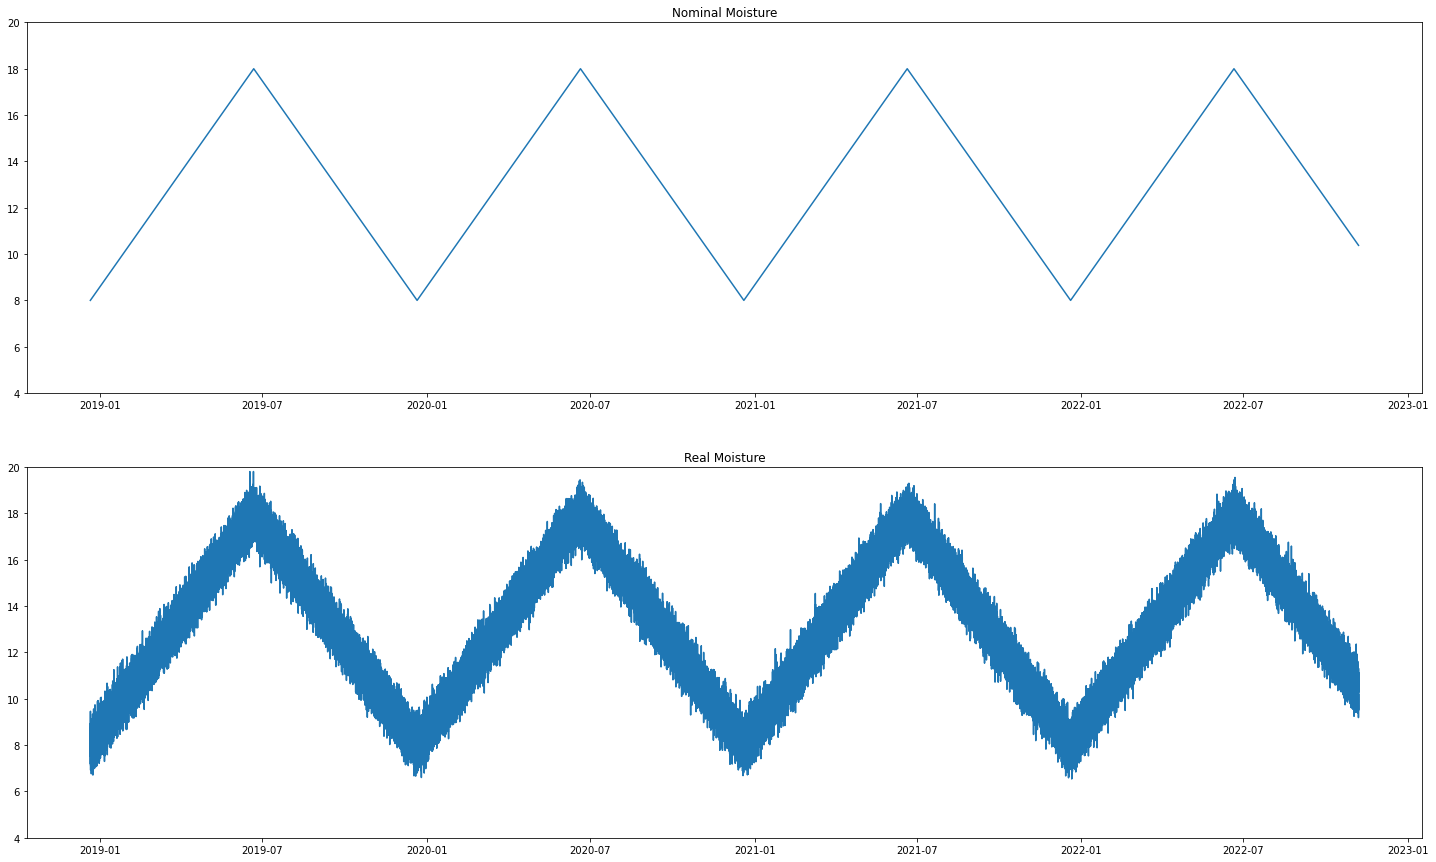

In [ ]:
figure, axes = plt.subplots(2,1,figsize=(25,15))
axes[0].plot(df_nominal['timestamp'], df_nominal['moisture_water_air'])
axes[1].plot(df_real['timestamp'], df_real['moisture_water_air'] )
axes[0].title.set_text('Nominal Moisture')
axes[1].title.set_text('Real Moisture')
axes[0].set_ylim([4,20])
axes[1].set_ylim([4,20])

## Extra inputs for AC




**Intercooler level switch**

It was assumed a sensor is keeping track if the intercooler level is inside the safe margin. It wasn't yet studied the type of sensors that could give this output.

- False means -> intercooler level inside the safe margin
- True means -> intercooler level outside the safe margin

For the **nominal** it is assumed it is always in safe level

For the **real**, we have estimated propabilities of the events to happen in 24.000 h:

- Outside of interooler level: 0.03 %

In [ ]:
#-----------NOMINAL----------------#
df_nominal['intercooler_level_switch'] = False

#-----------REAL----------------#
# Boolean array for intercooler level -> If True means the level is out of the nominal range
df_real['intercooler_level_switch'] = np.random.choice(random_arr, size = npoints, p=[0.9997, 0.0003])

**Aftercooler level switch**

It was assumed a sensor is keeping track if the aftercooler level is inside the safe margin. It wasn't yet studied the type of sensors that could give this output.

- False means -> aftercooler level inside the safe margin
- True means -> aftercooler level outside the safe margin

For the **nominal** it is assumed it is always in safe level

For the **real**, we have estimated propabilities of the events to happen in 24.000 h:

- Outside of interooler level: 0.03 %

In [ ]:
#-----------NOMINAL----------------#
df_nominal['aftercooler_level_switch'] = False

#-----------REAL----------------#
# Boolean array for aftercooler level -> If True means the level is out of the nominal range
df_real['aftercooler_level_switch'] = np.random.choice(random_arr, size = npoints, p=[0.9997, 0.0003])

**Oil counter**

A counter is added and increased in +1 each time the oil is replaced.




In [ ]:
random_factor = np.random.uniform(0.9,1.6)
random_factor_2 = np.random.uniform(0.85,1.4)

In [ ]:
df_nominal['oil_counter'] = 0
df_real['oil_counter'] = 0

In [ ]:
for point in range(0, len(df_nominal['oil_counter'])):
    if ((point>first_inspection*random_factor) & (point<(first_inspection + (second_inspection-first_inspection)*random_factor))):
  
        df_nominal['oil_counter'][point] = 0
    if ((point>=(first_inspection + (second_inspection-first_inspection)*random_factor)) & (point<(second_inspection + (third_inspection-second_inspection)*random_factor))):

        df_nominal['oil_counter'][point] = 1
    if ((point>=(second_inspection + (third_inspection-second_inspection)*random_factor)) & (point<(third_inspection + (fourth_inspection-third_inspection)*random_factor))):

        df_nominal['oil_counter'][point] = 2
    if ((point>=(third_inspection + (fourth_inspection-third_inspection)*random_factor)) & (point<fourth_inspection*random_factor_2)):

        df_nominal['oil_counter'][point] = 3
    if point>=fourth_inspection*random_factor_2:

        df_nominal['oil_counter'][point] = 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lo

In [ ]:
df_real['oil_counter'] = df_nominal['oil_counter']

**Oil filter counter**

A counter is added and increased in +1 each time the oil filter is replaced.

In [ ]:
df_nominal['oil_filter_counter'] = 0
df_real['oil_filter_counter'] = 0

In [ ]:
for point in range(0, len(df_nominal['oil_filter_counter'])):
    if ((point>first_inspection*random_factor) & (point<(first_inspection + (second_inspection-first_inspection)*random_factor))):
        df_nominal['oil_filter_counter'][point] = 0

    if ((point>=(second_inspection + (third_inspection-second_inspection)*random_factor)) & (point<(third_inspection + (fourth_inspection-third_inspection)*random_factor))):
        df_nominal['oil_filter_counter'][point] = 1

    if point>=(third_inspection + (fourth_inspection-third_inspection)*random_factor)*random_factor_2:
        df_nominal['oil_filter_counter'][point] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df_real['oil_filter_counter'] = df_nominal['oil_filter_counter']

**Bearings counter**

A counter is added and increased in +1 each time the bearings are replaced.

In [ ]:
df_nominal['bearings_counter'] = 0
df_real['bearings_counter'] = 0

In [ ]:
for point in range(0, len(df_nominal['bearings_counter'])):
    if ((point>first_inspection*random_factor) & (point<(first_inspection + (second_inspection-first_inspection)*random_factor))):
  
        df_nominal['bearings_counter'][point] = 0

    if point>=fourth_inspection*random_factor_2:

        df_nominal['bearings_counter'][point] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_real['bearings_counter'] = df_nominal['bearings_counter']

Motor speed 



In [ ]:
#MOTOR SPEED 
#Assuming average motor speed 1200 rpm 
#Max motor speed 1500 rpm and Min 1000 rpm 
df_nominal['motor_speed'] = get_truncated_normal(mean=1200, sd=20, low=1000, upp=1500).rvs(npoints)

In [ ]:
noise_size_factor_speed = 0.35
#MOTOR SPEED 
df_real['motor_speed'] = df_nominal['motor_speed'] 
df_real['motor_speed'] = df_real['motor_speed'] + degradation_components*0.0002 + noise*noise_size_factor_speed

## Motor vibration and motor current



We will assume the nominal values:

- Motor Windings temperature
- Motor Bearings temperature
- Motor vibration: SPMs don't know if it has much sense a nominal value ??? Let's assume 8 mA
- Bearings vibration: SPMs
- Motor current : 90 A

In [ ]:
#-----------NOMINAL----------------#
#MOTOR VIBRATION -> assuming nominal value for motor vibration 11mA
df_nominal['motor_vibration'] = 11.0
#BEARING VIBRATIONS -> assuming nominal value for motor vibration 8mA
df_nominal['bearing_vibration'] = 8.0
#MOTOR CURRENT -> assuming nominal value 90A
df_nominal['motor_current'] = 90.0


#-----------REAL----------------#
#MOTOR VIBRATION -> assuming a variation of +- 5 mA
df_real['motor_vibration'] = np.random.uniform(low = 5 , high= 17 , size = npoints) 
#BEARING VIBRATION -> assuming a variation of +- 5 mA
df_real['bearing_vibration'] = np.random.uniform(low = 3 , high= 13 , size = npoints)
#MOTOR CURRENT -> assuming variation +- 4A
df_real['motor_current'] = np.random.uniform(low = 86 , high= 94 , size = npoints) 

Adding **noise** to the sample

*Few relationships will be established in a random way*

- There should be a relation between temperature and motor current. 
- The vibration might be affected for both temperature and motor current.
- The motor current also varies with the temperature

*All the expressions are purely random and pretend only to generate dummy data*

In [ ]:
df_real['bearing_vibration'] = df_real['bearing_vibration'] + \
               np.random.randn(npoints) * np.mean(df_real['motor_current']) ** 2 / 20000 
df_real['motor_vibration'] = df_real['motor_vibration'] + \
               np.random.randn(npoints) ** 2 * np.mean(df_real['motor_windings_temperature']) ** (1/2) * 0.01 - np.random.randn(npoints) * np.std(df_real['motor_current']) * 0.1
df_real['motor_current'] = df_real['motor_current'] + \
               np.random.randn(npoints) / 3 * np.mean(df_real['motor_windings_temperature']) * (31/500) - np.std(df_real['motor_bearings_temperature']) ** (9/32)

In [ ]:
df_real.describe()

,running_hours,ambient_temperature,interior_temperature,oil_temperature,exhaust_temperature,hp_elements_temperature,lp_elements_temperature,motor_bearings_temperature,motor_windings_temperature,oil_pressure,air_inlet_pressure,air_outlet_pressure,exhaust_pressure,intercooler_pressure,aftercooler_pressure,radiator_coolant_level,oil_level,moisture_water_air,oil_counter,oil_filter_counter,bearings_counter,motor_speed,motor_vibration,bearing_vibration,motor_current
count,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000,136000.000000
mean,16999.875000,15.577964,112.686977,64.415776,152.525053,70.005289,39.988350,41.338548,61.099416,1.686677,1.677861,7.577147,3.394596,6.745266,2.278864,3.099109,9.991429,13.117910,2.214515,0.953493,0.706324,1204.232910,11.082630,7.999953,88.012925
std,9814.990661,14.455668,9.296187,8.706385,23.714830,1.393986,3.325061,11.680135,5.152702,0.797442,0.464937,0.545947,0.176612,0.556575,0.350809,0.173129,2.884710,2.891558,1.504004,0.728957,0.955908,21.181270,3.470399,2.911110,2.628240
min,0.000000,-18.102992,73.291856,44.268289,94.932130,64.109710,25.432245,-6.426731,38.955157,0.840067,0.945567,6.019412,2.626483,5.554510,1.188090,2.800003,5.000133,6.539274,0.000000,0.000000,0.000000,1106.023489,4.310236,1.670292,79.691313
25%,8499.937500,3.527341,106.305484,58.278727,135.872562,69.070668,37.740406,33.421002,57.593864,1.173819,1.367330,7.193979,3.274692,6.275247,2.030053,2.948915,7.493893,10.716027,1.000000,0.000000,0.000000,1189.825111,8.095505,5.510299,85.989186
50%,16999.875000,15.745846,112.426050,62.652535,146.891888,70.007932,39.995066,41.332395,61.036885,1.267823,1.474441,7.463900,3.396684,6.721786,2.287698,3.098537,9.989329,13.151716,2.000000,1.000000,0.000000,1204.128228,11.088953,7.992521,88.010709
75%,25499.812500,27.810780,118.824114,69.075227,164.351882,70.944815,42.241458,49.240535,64.537292,2.041458,1.880540,7.865111,3.517941,7.201764,2.538412,3.248829,12.478679,15.576122,4.000000,1.000000,2.000000,1218.401463,14.082900,10.494755,90.041097
max,33999.750000,47.530174,149.463773,100.789443,251.437086,76.161530,50.634277,100.487828,83.263900,4.215007,3.218339,9.882616,3.970916,7.958834,3.188347,3.400000,14.999980,19.811826,4.000000,2.000000,2.000000,1301.637975,18.162496,14.599206,96.465456


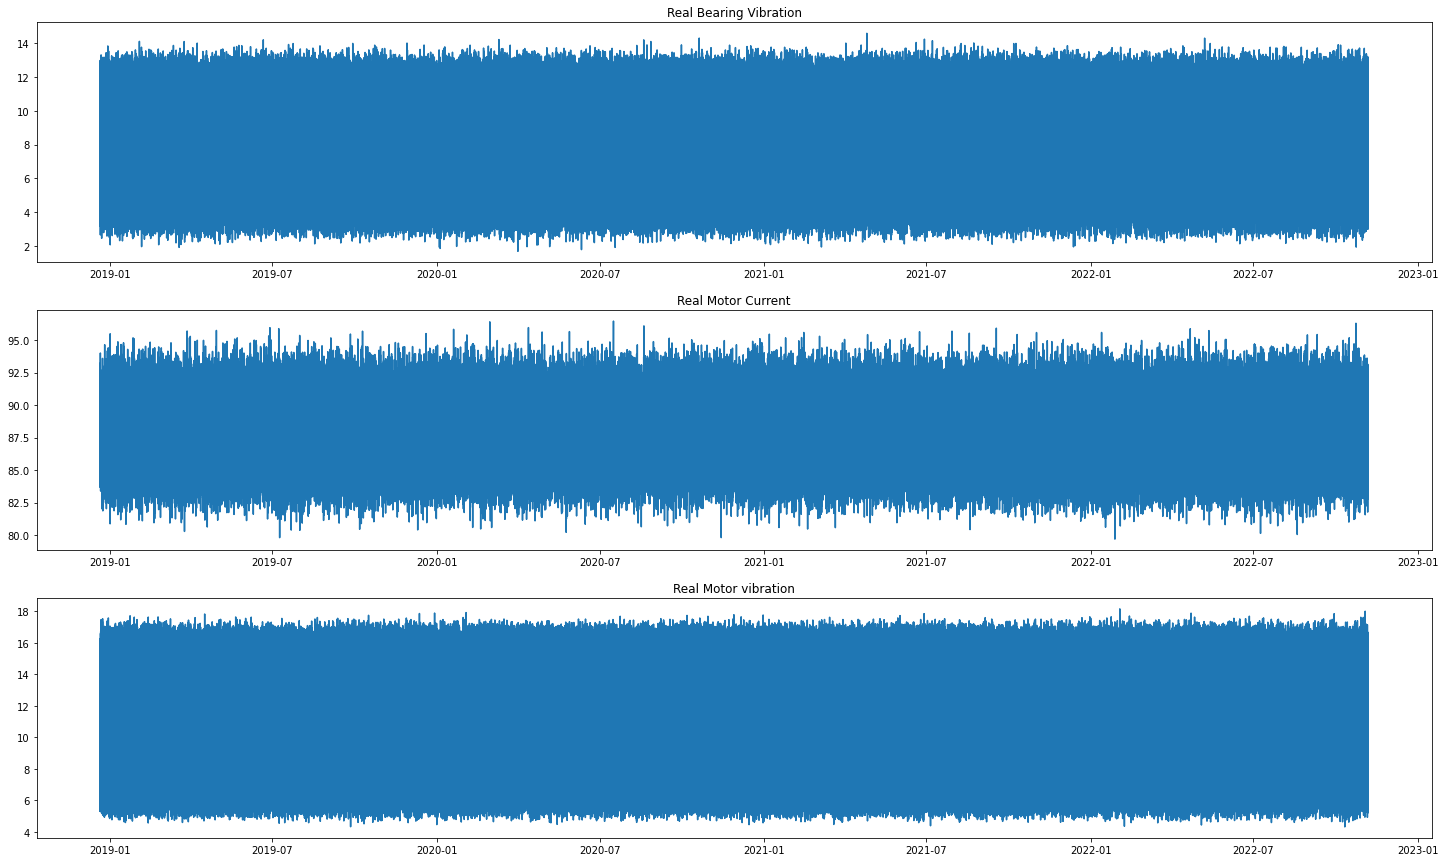

In [ ]:
figure, axes = plt.subplots(3,1,figsize=(25,15))
axes[0].plot(df_real['timestamp'], df_real['bearing_vibration'])
axes[1].plot(df_real['timestamp'], df_real['motor_current'])
axes[2].plot(df_real['timestamp'], df_real['motor_vibration'])


axes[0].title.set_text('Real Bearing Vibration')
axes[1].title.set_text('Real Motor Current')
axes[2].title.set_text('Real Motor vibration')


## Feature extraction

To be completed

## OneHot Encoding

The binary data needs to be encoded

## Failure history

This data is generated based on maintenance schedule.

Basically, it's assumed that in every inspection visit, different components need to be replaced because. That would mean different types of maintenance. 


- Before inspection visits: <2000 h > ---> maintenance_stage = 0
- Inspection visit 1: 2000-4000 h ---> maintenance_stage = 1
- Inspection visit 2: 4000-8000 h ---> maintenance_stage = 2
- Inspection visit 3: 6000-12000 h ---> maintenance_stage = 3
- Inspection visit 4: 20000-24000) h ---> maintenance_stage = 4
- After inspection visits: >24000 h  ---> maintenance_stage = 5

In [ ]:
df_real['maintenance_stage'] = 0
df_real.loc[df_real['running_hours'] < (2000*random_factor_1) , 'maintenance_stage'] = 0
df_real.loc[((df_real['running_hours'] > (2000*random_factor_1)) & (df_real['running_hours'] < (4000*random_factor_2))), 'maintenance_stage'] = 1
df_real.loc[((df_real['running_hours'] > (4000*random_factor_2)) & (df_real['running_hours'] < (6000*random_factor_3))), 'maintenance_stage'] = 2
df_real.loc[((df_real['running_hours'] > (6000*random_factor_3)) & (df_real['running_hours'] < (12000*random_factor_4))) , 'maintenance_stage'] = 3
df_real.loc[((df_real['running_hours'] > (12000*random_factor_4)) & (df_real['running_hours'] < (24000*random_factor_5))), 'maintenance_stage'] = 4
df_real.loc[df_real['running_hours'] > (24000*random_factor_5) , 'maintenance_stage'] = 5

## DataFrame Summary



### Nominal

In [ ]:
df_real.shape

(136000, 33)

In [ ]:
df_nominal.head()

,timestamp,running_hours,ambient_temperature,interior_temperature,oil_temperature,exhaust_temperature,hp_elements_temperature,lp_elements_temperature,motor_bearings_temperature,motor_windings_temperature,oil_pressure,air_inlet_pressure,air_outlet_pressure,exhaust_pressure,intercooler_pressure,aftercooler_pressure,oil_leakage,fuel_leakage,water_leakage_failure,electrolytes_level_failure,radiator_coolant_level,oil_level,dust_air_cleaner,moisture_water_air,intercooler_level_switch,aftercooler_level_switch,oil_counter,oil_filter_counter,bearings_counter,motor_speed,motor_vibration,bearing_vibration,motor_current
0,2018-12-21 00:00:00,0.00,-10.000000,125.624615,58.777612,138.970036,71.103169,41.887291,25.840990,64.265247,1.332396,1.255740,7.406106,3.227992,6.030934,2.196355,False,False,False,False,3.1,10.0,False,8.000000,False,False,0,0,0,1197.364964,11.0,8.0,90.0
1,2018-12-21 00:15:00,0.25,-9.997146,103.424028,60.995446,133.044873,72.886049,39.844774,33.891770,59.664439,1.060807,1.410258,5.945832,3.439545,7.512433,2.065574,False,False,False,False,3.1,10.0,False,8.000571,False,False,0,0,0,1226.218955,11.0,8.0,90.0
2,2018-12-21 00:30:00,0.50,-9.994292,110.642418,62.338942,129.118913,70.338299,33.517777,41.816225,62.935460,1.101060,1.554439,7.516609,3.356534,6.806258,2.219175,False,False,False,False,3.1,10.0,False,8.001142,False,False,0,0,0,1187.847954,11.0,8.0,90.0
3,2018-12-21 00:45:00,0.75,-9.991438,97.665705,55.396319,133.776426,69.852065,34.756920,45.332259,58.967560,1.191142,1.404993,5.789075,3.761332,7.219915,2.070565,False,False,False,False,3.1,10.0,False,8.001712,False,False,0,0,0,1197.767408,11.0,8.0,90.0
4,2018-12-21 01:00:00,1.00,-9.988584,112.314541,56.109448,127.143123,68.325347,36.424050,43.885675,63.537485,1.230786,1.672439,8.033359,3.271076,6.495932,2.933354,False,False,False,False,3.1,10.0,False,8.002283,False,False,0,0,0,1242.620326,11.0,8.0,90.0


In [ ]:
print(df_nominal.describe(include=[bool]))
print(df_nominal.describe())

       oil_leakage fuel_leakage water_leakage_failure  \
count       136000       136000                136000   
unique           1            1                     1   
top          False        False                 False   
freq        136000       136000                136000   

       electrolytes_level_failure dust_air_cleaner intercooler_level_switch  \
count                      136000           136000                   136000   
unique                          1                1                        1   
top                         False            False                    False   
freq                       136000           136000                   136000   

       aftercooler_level_switch  
count                    136000  
unique                        1  
top                       False  
freq                     136000  
       running_hours  ambient_temperature  interior_temperature  \
count  136000.000000        136000.000000         136000.000000   
mean    16999.

### Real

In [ ]:
df_real.shape

(136000, 34)

In [ ]:
df_real.head()

,timestamp,running_hours,ambient_temperature,interior_temperature,oil_temperature,exhaust_temperature,hp_elements_temperature,lp_elements_temperature,motor_bearings_temperature,motor_windings_temperature,oil_pressure,air_inlet_pressure,air_outlet_pressure,exhaust_pressure,intercooler_pressure,aftercooler_pressure,oil_leakage,fuel_leakage,water_leakage_failure,electrolytes_level_failure,radiator_coolant_level,oil_level,dust_air_cleaner,moisture_water_air,intercooler_level_switch,aftercooler_level_switch,oil_counter,oil_filter_counter,bearings_counter,motor_speed,motor_vibration,bearing_vibration,motor_current,maintenance_stage
0,2018-12-21 00:00:00,0.00,-7.937069,113.936209,58.634861,136.141705,70.111215,37.212403,56.033245,66.041203,1.196638,1.199744,7.304926,3.568555,7.427812,1.902150,False,False,False,False,3.046981,14.131423,False,7.861851,False,False,0,0,0,1204.777481,12.915052,9.008448,86.594394,0
1,2018-12-21 00:15:00,0.25,-12.456348,131.726085,65.593867,148.279816,68.117213,34.025251,38.337356,66.160964,1.060579,1.295699,7.687453,3.243167,6.886542,2.529850,False,False,False,False,3.005168,9.562503,False,8.454896,False,False,0,0,0,1196.678090,8.960853,10.762705,89.103710,0
2,2018-12-21 00:30:00,0.50,-9.440411,112.288366,60.728331,143.361664,70.639172,36.352238,39.285229,53.482088,1.154107,1.437459,7.705907,3.552482,6.158032,2.213432,False,False,False,False,3.091997,9.491188,False,8.427055,False,False,0,0,0,1204.029135,8.444947,11.079353,89.232935,0
3,2018-12-21 00:45:00,0.75,-10.926776,99.198243,72.015934,156.710123,70.745347,43.901531,27.971322,67.951059,1.089649,1.359284,7.205842,3.663733,7.606075,2.764956,False,False,False,False,2.821010,10.330072,False,8.496095,False,False,0,0,0,1181.395722,6.048202,3.369798,87.216418,0
4,2018-12-21 01:00:00,1.00,-9.180950,111.440982,59.715799,157.420234,70.071269,43.959160,23.403818,62.635816,1.195432,1.546849,8.082243,3.341828,6.358197,2.179461,False,False,False,False,3.017600,6.411915,False,8.760852,False,False,0,0,0,1207.620743,8.665642,12.936705,83.683635,0


In [ ]:
print(df_real.describe(include=[bool]))
print(df_real.describe())

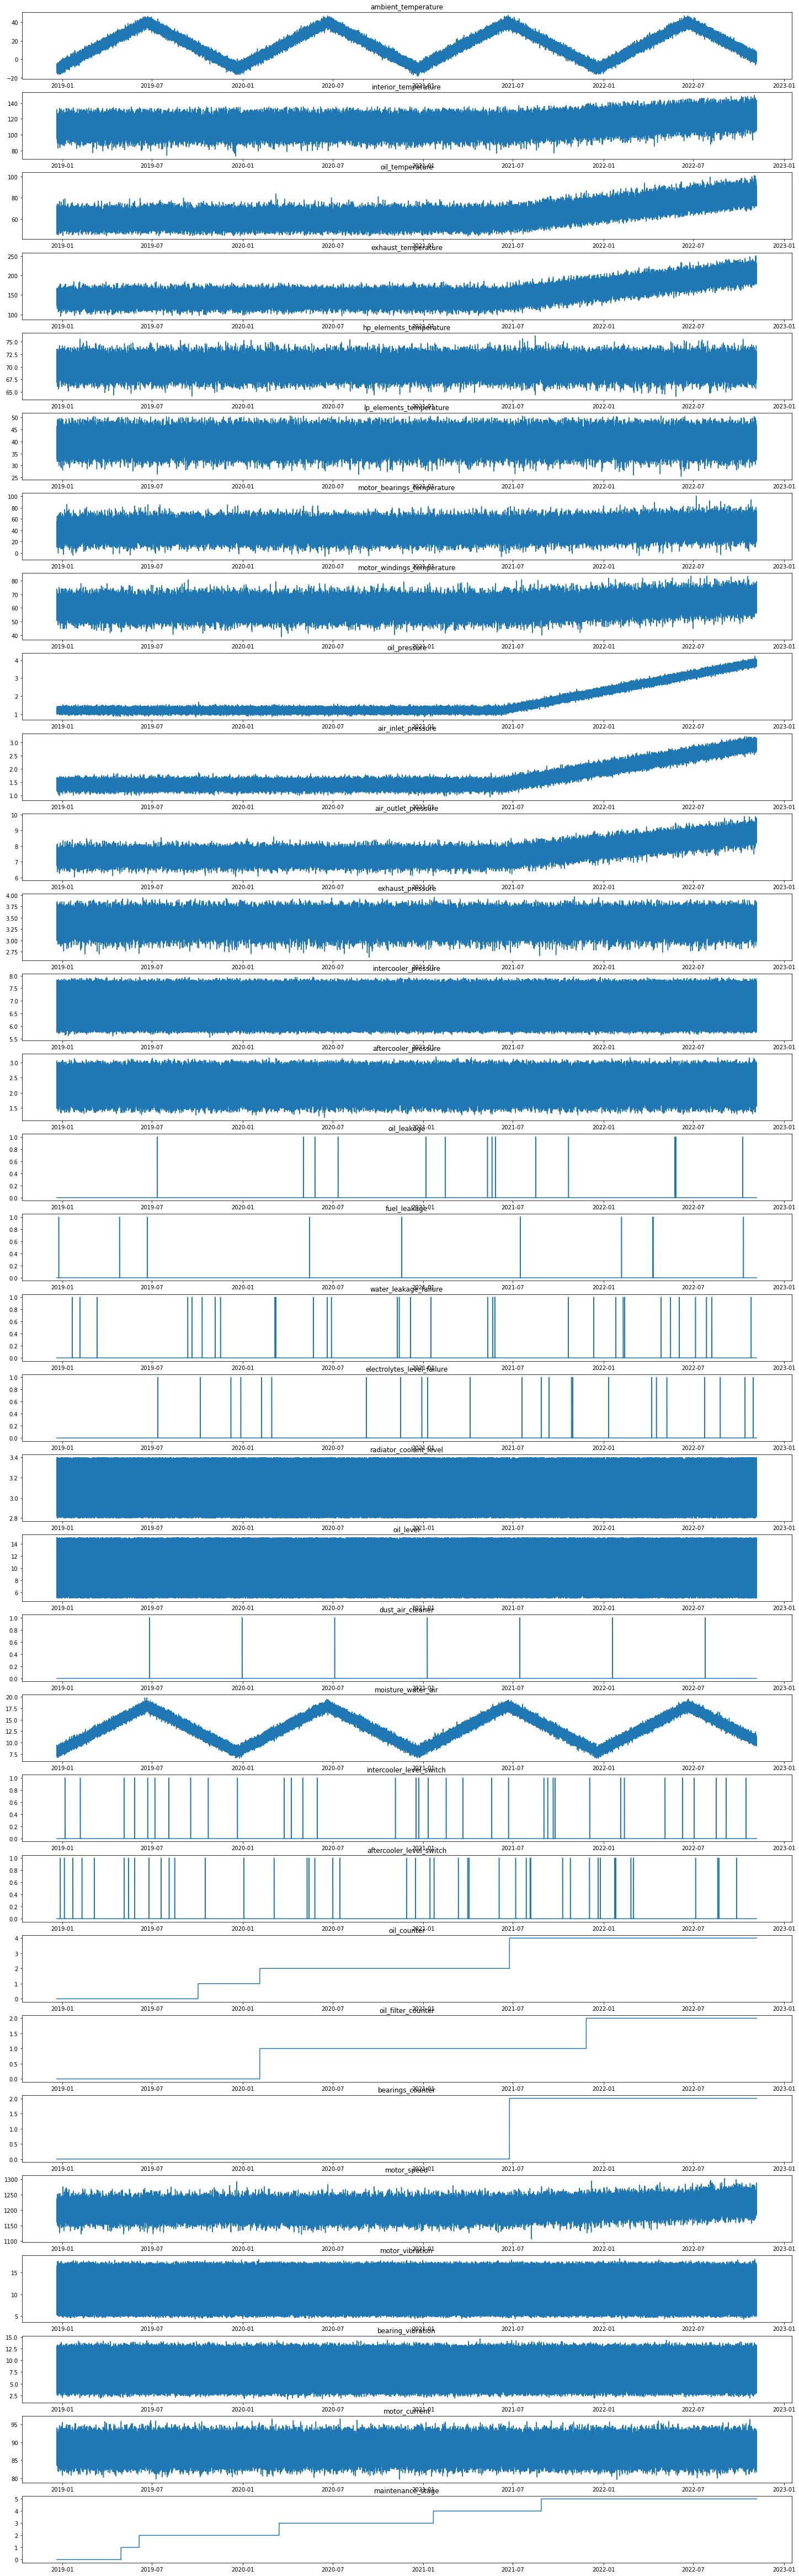

In [ ]:
figure, axes = plt.subplots((len(df_real.columns)-2),1,figsize=(25,85))
for i in range(0,(len(df_real.columns)-2)):
  axes[i].plot(df_real['timestamp'], df_real.iloc[:,(i+2)])
  axes[i].title.set_text(df_real.columns[(i+2)])


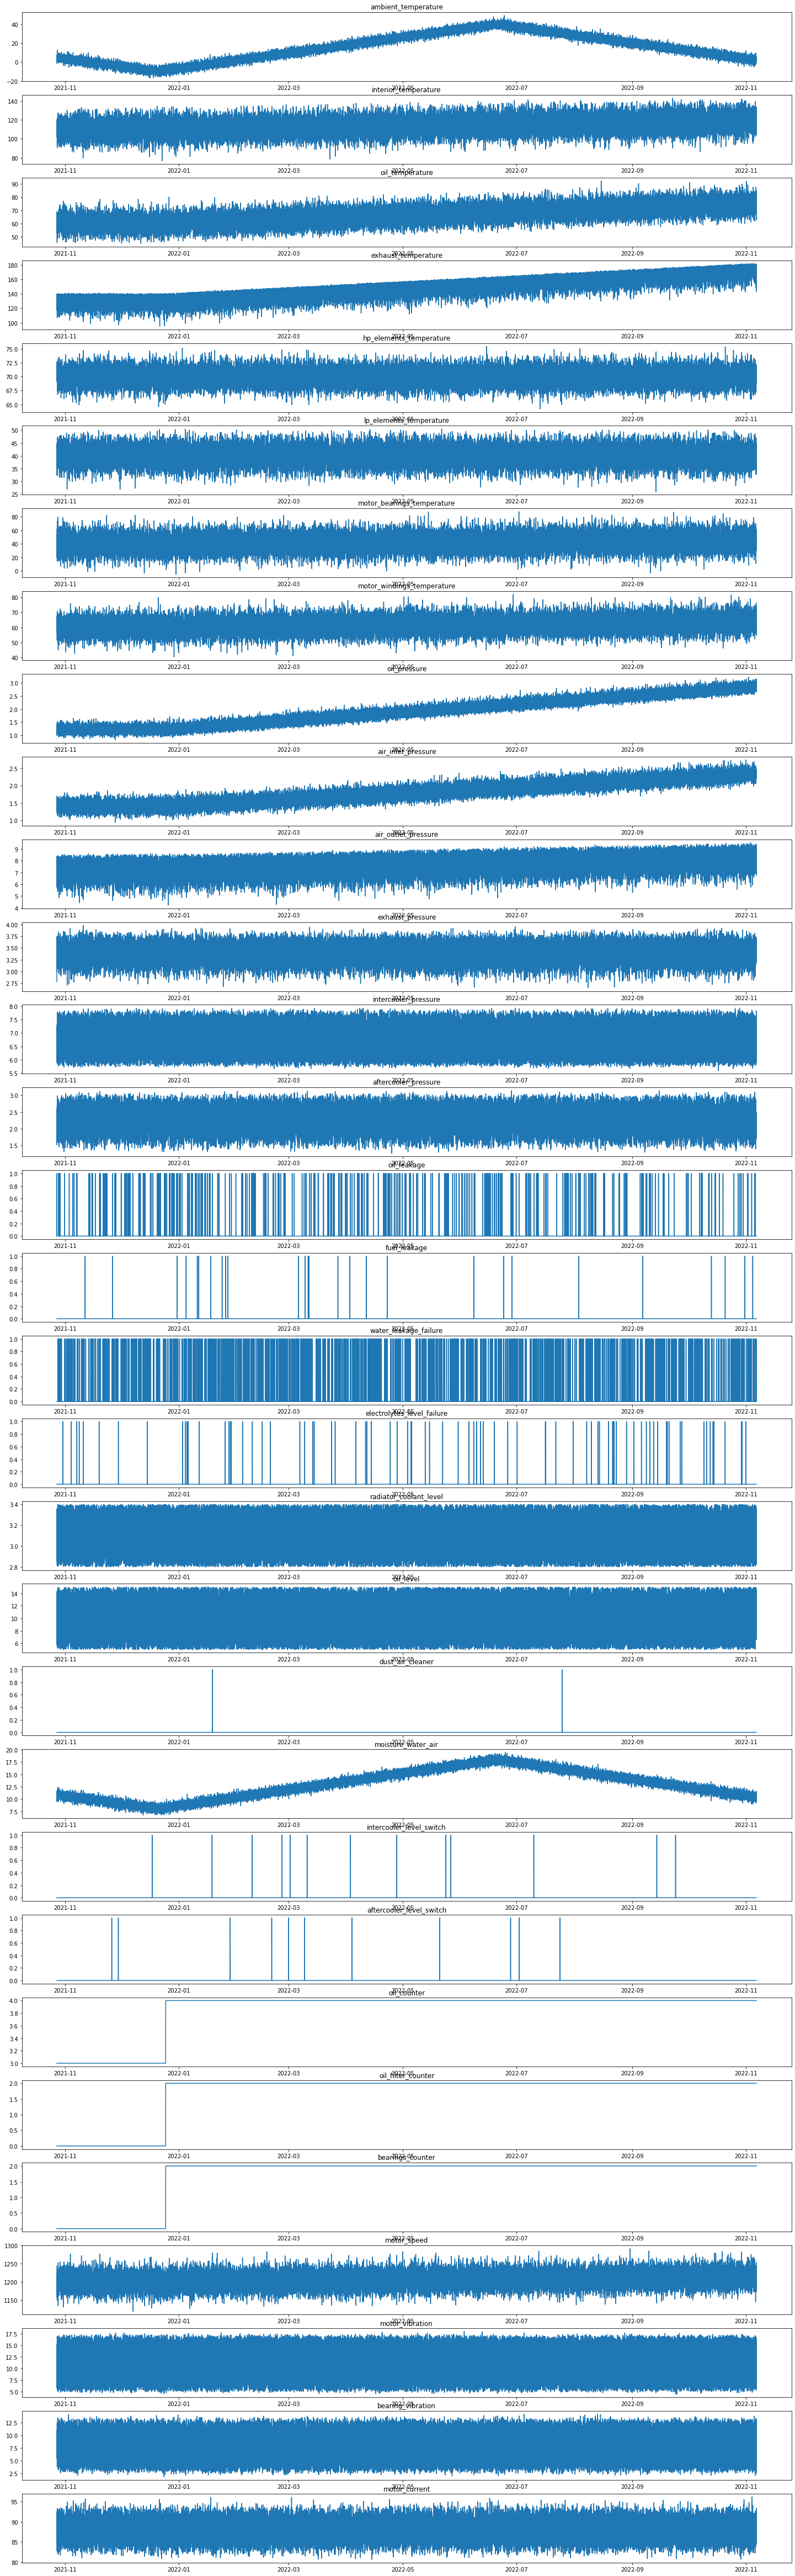

In [ ]:
start = 100000
end = 500000
figure, axes = plt.subplots((len(df_real.columns)-2),1,figsize=(25,85))
for i in range(0,(len(df_real.columns)-2)):
  axes[i].plot(df_real.iloc[start:end,:]['timestamp'], df_real.iloc[start:end,(i+2)])
  axes[i].title.set_text(df_real.columns[(i+2)])

# 2. Diagnostics: What **predictive manintenance model** to apply?






As we saw before, the state of the art includes 5 different models. We will see different proposals including these models.*(Yet under development)*
1. Using both Vibration Analysis and Motor Current Analysis
2. Using Fluid Analysis
3. Using Ultra-Sound Test


## 1. Predictive maintenance with vibrations motor temperature and motor current

To move from periodic compressor maintenance to predictive maintenance, the five parameters that will be monitored are motor bearings temperature, motor windings temperature, motor vibration, bearings vibration and motor current.

These parameters are good indicators of compressor health, are simple to start with, and can be instrumented without much effort or cost—and without taking the machine apart.

There is need of **vibration** sensors (motor and windings) with a 4-20 mA output. These sensors are widely available, inexpensive and could be mounted on the motor and other areas. We would need 12-30 VDC to power the loop, and the 4-20 mA signal would be wired to a SNAP-AIMA module.

Next, the motor’s **three-phase current** can be meassured by using three split-core current transformers installed at the compressor disconnect switch. The motor is rated at about 90 A, so we'd select appropriate current transformers (CTs) with an adequate inner diameter to accommodate the feed wire. Many CTs have a standard 5 A secondary, so we would wire these three signals to two SNAP-AIARMS modules.


<p align="center">
  <img width="460" height="500" src="https://blog.opto22.com/hs-fs/hubfs/Blog_predictiveMaintenance.jpg?width=352&name=Blog_predictiveMaintenance.jpg">
</p>


### Supervised Machine Learning: LogisticRegression



Usually, they will provide you with two datasets — one with information about stops (their nature, causes, and timestamp) and a second with all the data from the sensors.

For **first approximation** we will assume it is known when the predictive maintenance is needed. 

This way we will run a **supervised machine learning** model. \
*However, the problem will after turn more complex and techniques for unsupervised ML will need to be applied*

For calculating if predictive maintenance is needed? Assumptions:

- Motor temperature should not exceed more than 135 degrees
- Motor vibration output should not get above 17.5 mA
- Motor current > not exceed 10% more than the nomial current 90A

In [ ]:
#-----------NOMINAL----------------#
df_nominal['maintenance_needed'] = ((df_nominal['motor_temperature']  > 135) | (df_nominal['motor_vibration'] > 17.5) | (df_nominal['motor_current'] > (1.15*90)))
#-----------REAL----------------#
df_real['maintenance_needed'] = ((df_real['motor_temperature']  > 135) | (df_real['motor_vibration'] > 17.5) | (df_real['motor_current'] > (1.15*90)))

In [ ]:
df_nominal['maintenance_needed'].value_counts() # True: cases in which maintenance is needed

In [ ]:
df_real['maintenance_needed'].value_counts() # True: cases in which maintenance is needed

We will plot the distributions between pairs of variables distinguishing if the maintenance is needed

1. Motor current vs Motor vibration
2. Motor temperature vs Motor vibration
3. Motor temperature vs Motor Current

In [ ]:
figure, axes = plt.subplots(3,1,figsize=(10,12))

axes[0].scatter(df_real['motor_current'], df_real['motor_vibration'] , c = df_real['maintenance_needed'])
axes[1].scatter(df_real['motor_temperature'], df_real['motor_vibration'] , c = df_real['maintenance_needed'])
axes[2].scatter(df_real['motor_temperature'], df_real['motor_current'] , c = df_real['maintenance_needed'])

axes[0].title.set_text('Motor current vs Motor vibration')
axes[1].title.set_text('Motor temperature vs Motor vibration')
axes[2].title.set_text('Motor temperature vs Motor Current')


** From the previous graphs** we observe that there is a strong relationship between motor current and temperature

To build a strong classification model is better to observe idependent variables. Hence, the model will be built with the **motor vibration** and **motor current **.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df_real[['motor_vibration','motor_current']] , df_real['maintenance_needed'])

lr = LogisticRegression()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
plt.scatter(X_test['motor_current'] , X_test['motor_vibration'], c = predictions)
np.mean(predictions == y_test)

In [ ]:
X_train = df_nominal[['motor_vibration','motor_current']]
y_train = df_nominal['maintenance_needed']
X_test = df_real[['motor_vibration','motor_current']]
y_test = df_real['maintenance_needed']


In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
plt.scatter(X_test['motor_current'] , X_test['motor_vibration'], c = predictions)
np.mean(predictions == y_test)

In [ ]:
df_real.head()

### Supervised Machine Learning: Recurrent Neural Network
For the next step once we know we should adress the *motor vibration* and the *motor current* as key variables, we will build a **Recurrent Neural Network**. The NN will classify in the possible errors that could happen, our generated dummy data

Data preprocessing is the most important step towards training any neural network. For neural networks like RNN (Recurrent Neural Network), the network is very sensitive to the input data and the data needs to be in range of -1 to 1 or 0 to 1. This range i.e, -1 to 1 or 0 to 1, is usually because of the tanh (see Fig 5) is the activation function accompanied in the hidden layers of the network. Thus, the data must be normalized before the training of the model.

<p align="center">
  <img width="350" height="300" src="https://miro.medium.com/max/1120/1*viG5sbutu-6ZnjLI-s9YXQ.png">
</p>


#### Scaling the data

Using the MinMaxScaler function provided by sklearn’s preprocessing library we normalize our training data in the scale ranging in 0 to 1, although, theoritcally we could normalize and experiment our data to -1 to 1. 


Select only numeric data

In [ ]:
train_df = df_real.select_dtypes(include=np.number)
train_df.head()

,running_hours,ambient_temperature,interior_temperature,oil_temperature,exhaust_temperature,hp_elements_temperature,lp_elements_temperature,motor_bearings_temperature,motor_windings_temperature,oil_pressure,air_inlet_pressure,air_outlet_pressure,exhaust_pressure,intercooler_pressure,aftercooler_pressure,radiator_coolant_level,oil_level,moisture_water_air,oil_counter,oil_filter_counter,bearings_counter,motor_speed,motor_vibration,bearing_vibration,motor_current
0,0.00,-12.165260,108.694346,66.471119,134.155544,67.622254,37.941017,45.483109,54.181261,1.391703,1.370537,6.246199,2.848832,6.865942,2.676419,3.345445,6.230964,7.194662,0,0,0,1188.075588,5.401423,11.086912,87.421573
1,0.25,-8.131047,99.785668,60.259859,137.077491,68.617165,42.401520,52.345889,56.943421,1.150705,1.304729,6.399774,3.315244,6.374971,2.191126,2.912511,7.722204,7.984983,0,0,0,1202.546251,16.294263,12.244193,88.541960
2,0.50,-10.866665,119.001874,49.110530,125.259528,68.543477,42.141398,35.024566,56.909609,1.202559,1.446866,5.278240,3.174072,7.182368,1.591487,2.924637,7.974156,8.296078,0,0,0,1200.850248,7.188310,5.694106,84.329179
3,0.75,-10.259394,108.085781,58.296749,134.789756,66.997486,38.364552,48.861019,59.640445,1.103096,1.363114,7.990179,3.251943,6.721232,2.488931,2.943263,5.266188,8.103429,0,0,0,1201.870200,7.292500,9.011806,89.666324
4,1.00,-14.070900,111.865658,57.909796,127.691938,68.422955,39.742272,39.492316,69.093877,0.984879,1.315250,5.796994,3.629793,6.369990,1.765631,3.375739,11.689510,8.476293,0,0,0,1173.921680,11.671455,3.755979,85.994872


Select the columns to be normalized

In [ ]:
columns_tb_normalized= ['ambient_temperature', 'interior_temperature', 'oil_temperature',
       'exhaust_temperature', 'hp_elements_temperature',
       'lp_elements_temperature', 'motor_bearings_temperature',
       'motor_windings_temperature', 'oil_pressure', 'air_inlet_pressure',
       'air_outlet_pressure', 'exhaust_pressure', 'intercooler_pressure',
       'aftercooler_pressure', 'radiator_coolant_level', 'oil_level',
       'moisture_water_air',  'motor_speed', 'motor_vibration',
       'bearing_vibration', 'motor_current']

In [ ]:
columns_tb_normalized

['ambient_temperature',
 'interior_temperature',
 'oil_temperature',
 'exhaust_temperature',
 'hp_elements_temperature',
 'lp_elements_temperature',
 'motor_bearings_temperature',
 'motor_windings_temperature',
 'oil_pressure',
 'air_inlet_pressure',
 'air_outlet_pressure',
 'exhaust_pressure',
 'intercooler_pressure',
 'aftercooler_pressure',
 'radiator_coolant_level',
 'oil_level',
 'moisture_water_air',
 'motor_speed',
 'motor_vibration',
 'bearing_vibration',
 'motor_current']

In [ ]:
train_df.columns.intersection(columns_tb_normalized)

Index(['ambient_temperature', 'interior_temperature', 'oil_temperature',
       'exhaust_temperature', 'hp_elements_temperature',
       'lp_elements_temperature', 'motor_bearings_temperature',
       'motor_windings_temperature', 'oil_pressure', 'air_inlet_pressure',
       'air_outlet_pressure', 'exhaust_pressure', 'intercooler_pressure',
       'aftercooler_pressure', 'radiator_coolant_level', 'oil_level',
       'moisture_water_air', 'motor_speed', 'motor_vibration',
       'bearing_vibration', 'motor_current'],
      dtype='object')

In [ ]:
train_df.columns[1:len(train_df)]

Index(['ambient_temperature', 'interior_temperature', 'oil_temperature',
       'exhaust_temperature', 'hp_elements_temperature',
       'lp_elements_temperature', 'motor_bearings_temperature',
       'motor_windings_temperature', 'oil_pressure', 'air_inlet_pressure',
       'air_outlet_pressure', 'exhaust_pressure', 'intercooler_pressure',
       'aftercooler_pressure', 'radiator_coolant_level', 'oil_level',
       'moisture_water_air', 'oil_counter', 'oil_filter_counter',
       'bearings_counter', 'motor_speed', 'motor_vibration',
       'bearing_vibration', 'motor_current'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
train_df[train_df.columns.intersection(columns_tb_normalized)] = sc.fit_transform(train_df[train_df.columns.intersection(columns_tb_normalized)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
train_df.head()

,running_hours,ambient_temperature,interior_temperature,oil_temperature,exhaust_temperature,hp_elements_temperature,lp_elements_temperature,motor_bearings_temperature,motor_windings_temperature,oil_pressure,air_inlet_pressure,air_outlet_pressure,exhaust_pressure,intercooler_pressure,aftercooler_pressure,radiator_coolant_level,oil_level,moisture_water_air,oil_counter,oil_filter_counter,bearings_counter,motor_speed,motor_vibration,bearing_vibration,motor_current
0,0.00,0.104640,0.514233,0.481702,0.451479,0.287995,0.488453,0.549204,0.344362,0.231228,0.241037,0.423376,0.194576,0.535153,0.737783,0.909082,0.123084,0.059055,0,0,0,0.399256,0.081478,0.737022,0.435162
1,0.25,0.164881,0.389101,0.349776,0.484862,0.369446,0.667255,0.616288,0.410456,0.134063,0.203775,0.450925,0.531333,0.328030,0.492057,0.187518,0.272211,0.118322,0,0,0,0.483949,0.865745,0.827734,0.499118
2,0.50,0.124031,0.659013,0.112966,0.349842,0.363413,0.656828,0.446970,0.409647,0.154970,0.284257,0.249738,0.429404,0.668641,0.188432,0.207729,0.297406,0.141651,0,0,0,0.474023,0.210131,0.314314,0.258638
3,0.75,0.133100,0.505685,0.308080,0.458724,0.236846,0.505431,0.582223,0.474992,0.114869,0.236835,0.736221,0.485628,0.474105,0.642850,0.238772,0.026604,0.127204,0,0,0,0.479992,0.217632,0.574367,0.563300
4,1.00,0.076184,0.558777,0.299861,0.377632,0.353546,0.560658,0.490643,0.701198,0.067206,0.209733,0.342795,0.758441,0.325929,0.276609,0.959572,0.668949,0.155166,0,0,0,0.316418,0.532910,0.162396,0.353721


#### (If we have data from several compressors)

When using data for several compressors

[link text](https://towardsdatascience.com/predictive-maintenance-of-turbofan-engine-64911e39c367)

In [ ]:
time_steps = 50
def gen_sequence(id_df):
  data_matrix = id_df.iloc[:,1:len(train_df)].values
  num_elements = data_matrix.shape[0]
  for start, stop in zip(range(0, num_elements-time_steps),range(time_steps, num_elements)):
    yield data_matrix[start:stop, :]

In [ ]:
def gen_labels(id_df, label):
  data_matrix = id_df[label].values
  num_elements = data_matrix.shape[0]
  return data_matrix[time_steps:num_elements, :]

In [ ]:
for compressor_id in train_df.id.unique():
     for sequence in gen_sequence(train_df[train_df.id==compressor_id]):
           x_train.append(sequence) 

In [ ]:
x_train = np.asarray(x_train)

In [ ]:
for compressor_id in train_df.id.unique():
    for label in gen_labels(train_df[train_df.id==compressor_id],['maintenance_stage'] ):
        y_train.append(label)

In [ ]:
y_train = np.asarray(y_train).reshape(-1,1)

In [ ]:
y_train.shape

#### Create 3D array to input the RNN

For X_train: 
- We take all the columns, even including counters and maintenance_stage.

For y_train:
- We take the maintenance_stage in +60

In [ ]:
X_train = []
y_train = []
for i in range(60, len(train_df)):
      X_train.append(train_df.iloc[i-60:i, :]) 
      y_train.append(train_df.iloc[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(135940, 60, 26)

In [ ]:
y_train.shape

(135940, 1)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], (len(train_df.columns))))

In [ ]:
y_train = np.asarray(y_train).reshape(-1,1)

#### (In case we need a column for RUL)

We need to know more less what is our Remaining Useful Life. Assuming:

- Maximum Useful Life for the compressor: 24.000 h
- The RUL in each data point would be the maximum - the number of running hours




In [ ]:
train_df['RUL'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(0,(len(train_df['RUL'])-1)):
  train_df.RUL.loc[i] = (24000 - train_df.running_hours.loc[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_df.tail()

,running_hours,motor_temperature,pressure,radiator_coolant_level,oil_level,moisture_water_air,motor_vibration,motor_current,RUL
95995,23998.75,0.391203,0.515583,0.093363,0.532344,0.516994,0.845523,0.660616,1.25
95996,23999.00,0.459140,0.528688,0.460461,0.358641,0.490502,0.094025,0.488703,1.00
95997,23999.25,0.439195,0.496879,0.626031,0.098778,0.529743,0.674380,0.325148,0.75
95998,23999.50,0.584919,0.456847,0.001547,0.393850,0.551515,0.744536,0.536652,0.50
95999,23999.75,0.421815,0.487906,0.281590,0.350556,0.506524,0.768301,0.546430,0.25


Once we have our data normalized, we employ a classification approach in order to predict RUL. We do this by adding new labels for our classifcation approach onto our dataset by the following.

#### BUILDING THE MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *

In [ ]:
model = Sequential()
#input

In [ ]:
model.add(LSTM(units=50, return_sequences='true', activation='tanh', input_shape = (X_train.shape[1], X_train.shape[2])) )
model.add(Dropout(0.2))

In [ ]:
#hidden layer 1
model.add(LSTM(units=60, return_sequences='true',activation='tanh'))
model.add(Dropout(0.2))

In [ ]:
#hidden layer 2
model.add(LSTM(units=60, activation='tanh'))
model.add(Dropout(0.2))

Number of possible outputs

Units = 6 => Classification

- Before inspection visits: <2000 h > ---> maintenance_stage = 0
- Inspection visit 1: 2000-4000 h ---> maintenance_stage = 1
- Inspection visit 2: 4000-8000 h ---> maintenance_stage = 2
- Inspection visit 3: 6000-12000 h ---> maintenance_stage = 3
- Inspection visit 4: 20000-24000) h ---> maintenance_stage = 4
- After inspection visits: >24000 h  ---> maintenance_stage = 5

In [ ]:
#output
model.add(Dense(units=1,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 60, 50)            15400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 60)                29040     
_________________________________________________________________
dropout_15 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
history = model.fit(X_train, y_train,batch_size=32, epochs=30)

Epoch 1/30
1837/4249 [===========>..................] - ETA: 3:57 - loss: 0.0000e+00 - accuracy: 0.0607

### UnSupervised Machine Learning



## 2. Predictive maintenance using Fluid Analysis

To be completed

## 3. Predictive maintenance using Ultra-Sound Test

To be completed

# Prognostics

    # Prognostics: predicting the time at which something will no longer perform it's indended function
    # Remaining Useful Life (RUL): continious target, number of useful cycles left on the engine
    # Last 15 Cycles: binary target, represents whether the asset is in the last 15 cycles of life

# Health management
To be completed

# Other info

### Filter replacement

Tracking differential pressure across the compressor’s fluid would also give us great data to trigger filter replacement, but measuring it might require pipework. It was decided that tracking motor current and, perhaps, adding temperature sensors on the fluid pipes would suffice for now.

### PS: What is the best interval for taking a compressor oil analysis sample?

NM: It depends. Usually, you want to take an oil sample right away after the first run or after a few weeks to get a good baseline. Then you want to take another sample at approximately 2,000 hours, depending on your service intervals and the type of oil/fluid used. Some fluids are designed for longer service life. Best practice is to do it at every scheduled fluid change. Installation site factors like humidity, dusty environments, etc may warrant more frequent fluid sampling.

### Seasons

If your plant is seasonal, then December might be your highest month and March might be your lowest month. If you have a three-month interval, that might be a great opportunity for you to figure out how your temperatures run, how your flow performs, your leak load during federal holidays, and more.


### PS: What is the most important data point?

TH: I just have to smile a bit because there's so single most  important data point or factor. There are two general areas to consider: compressed air application and compressor environment. **Pressure and temperature** are two important  values equipment function and compressor health. If you really want to narrow it down and you have to sacrifice data points, then that's certainly something you want to look at. It’s not necessarily that there's one important data point; it's always a combination of the data that you need.

# Additional Information as potential sources of interest for use during the project

***Check the links***
*   "Dashboard Image on this site" https://www.datylon.com/customer-stories/cmc
*   "A Study on Estimating the Next Failure Time of Compressor Equipment in an Offshore Plant" https://www.hindawi.com/journals/mpe/2016/8705796/
*   "What are common preventative maintenance schedules and checklists for air compressors?" https://www.onupkeep.com/answers/preventive-maintenance/common-preventative-maintenance-checklists-for-air-compressors
*   "Air Compressor Predictive Maintenance (IoT Central)" https://azuremarketplace.microsoft.com/en-us/marketplace/apps/kaispellc.kaisp_aircompm_iotcen?tab=overview
*   Atlas Copco's SmartLink system https://www.atlascopco.com/en-uk/compressors/customer-offers/get-connected-with-smartlink
*   Industrial Air Compressor Preventative Maintenance https://www.quincycompressor.com/industrial-air-compressor-preventative-maintenance/
*   Compressed Air Predictive Maintenance https://www.iacserv.com/air_compressor_predictive_maintenance.html (interesting to know: our work package team has helped the new ceramic desiccant product's upscaling to production line level; key contact: Sven Storms, project manager => he could perhaps obtain from the production line leader more insights on detection of wear in the desiccant, within an air compressor)


***Symptoms leading to need for maintenance:***
*   pressure drops in an area of the system
*   List item





